In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
import numpy as np
import matplotlib.pyplot as plt
from lightcurves_from_images import *

In [2]:
def to_counts(lc, zp, t_exp):
    return t_exp*10**((lc-zp)/-2.5)

In [3]:
image_path = "/home/rcarrasco/simulated_data/image_sequences/complete_june1_erf_distr2500.hdf5"
camera_and_obs_cond_path = "../real_obs/pickles/camera_and_obs_cond.pkl"
save_path = "/home/rcarrasco/simulated_data/image_sequences/lightcurves_from_images/"
file_name = "complete_june8_erf_distr2500photometry"
bands = ["g",]
chunk_size = 100
times_seeing = 2.0*(1/(2*np.sqrt(2*np.log(2))))

photometry = ImagePhotometry(images_path=image_path,
                             obs_cond=camera_and_obs_cond_path,
                             bands=bands,
                             save_path=save_path,
                             chunk_size=chunk_size,
                             times_seeing=times_seeing)

image_data = photometry.image_data

In [4]:
field = "Field01"
band = "g"
print(list(image_data[field].keys()))
lc_type = image_data[field]["lc_type"][:]
object_index = np.where(lc_type=="Supernovae")[0]
print(object_index[:60])
ex_index = 10
seq_example_keys = ["images", "psf_image", "galaxy_image", "count_lightcurves"]
example_data = {}
for name in seq_example_keys:
    example_data[name] = image_data[field][name][band][ex_index, ...]
seeing = image_data[field]["obs_cond"]["seeing"]["g"][:]
days = image_data[field]["obs_cond"]["obs_day"]["g"][:]
print(np.amin(image_data[field]["lightcurves"][band][ex_index, ...]))
#GOOD INDEX FOR SUPERNOVAE 161, 346, 402

['count_lightcurves', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
[ 10  13  23  29  34  37  38  44  49  53  69  77  78  97 100 104 105 110
 122 131 135 136 139 144 147 153 178 180 208 217 218 226 227 230 234 237
 241 245 252 253 269 270 273 275 277 279 280 285 286 287 294 316 317 320
 334 336 342 351 356 369]
20.771091


In [5]:
sky, sky_variance = photometry.estimate_sky_from_images(field)
mask, _ = photometry.get_apperture_mask(seeing)#, times_seeing=times_seeing)

In [6]:
est_lc, est_variance, residuals, clean = photometry.get_lightcurve(example_data["images"],
                                                                   example_data["galaxy_image"],
                                                                   example_data["psf_image"],
                                                                   mask,
                                                                   sky,
                                                                   sky_variance)


estimated values
[ 787. 1043. 1081. 1858. 1947. 1938. 2058. 2069. 1968. 2264. 2257. 2243.
 2431. 2496. 2430. 2346. 2374. 2056. 2634. 2687. 2894. 3219. 3227. 3180.
 2964. 3689. 3820. 4302. 4422.]
estimated variance
[ 69.13256583  71.51167427  70.47592024  73.9050987   73.92100933
  74.75536786  73.69099661  74.69983434  73.26019223  77.82213819
  76.0478026   75.43595362  78.16060018  79.43450888  78.0590124
  74.18281605  74.95912013  68.17068204  76.90947996  75.03456889
  81.88669196  80.09836041  80.47524656  81.91179374  77.00970838
  87.21111634  82.94939238 111.38582534 108.28992884]
simulated values
[ 862. 1109. 1185. 1935. 1947. 2132. 2228. 2215. 2101. 2331. 2345. 2349.
 2543. 2601. 2566. 2392. 2415. 2252. 2685. 2744. 2981. 3281. 3381. 3339.
 3056. 3764. 3909. 4473. 4545.]


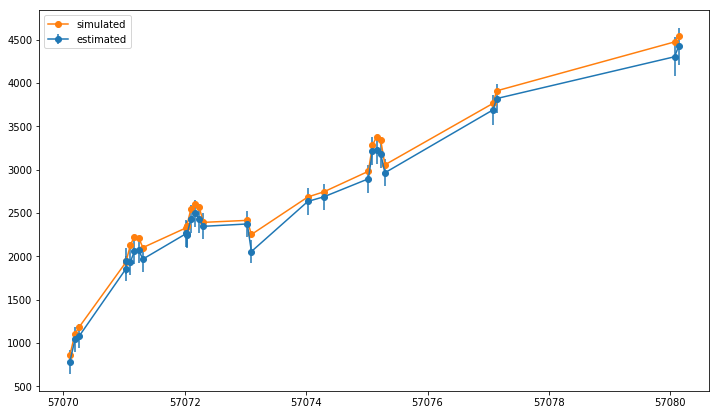

time 0


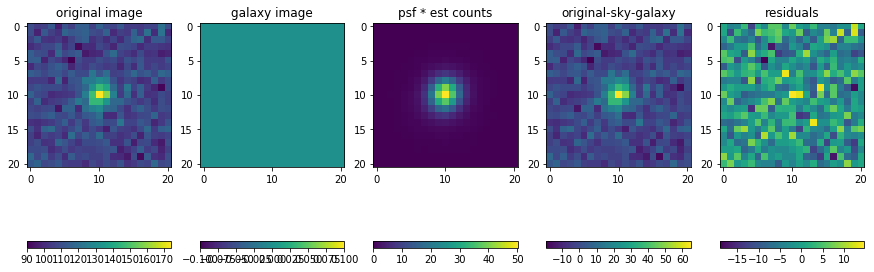

time 1


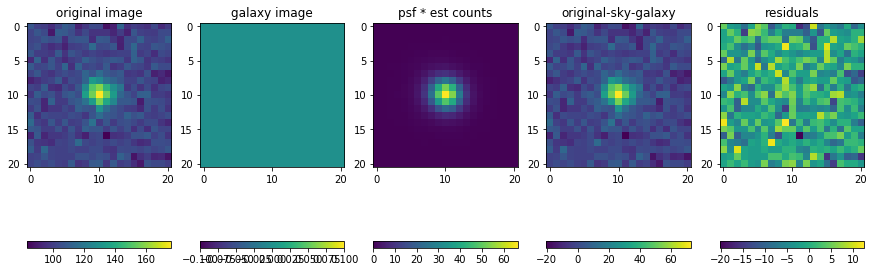

time 2


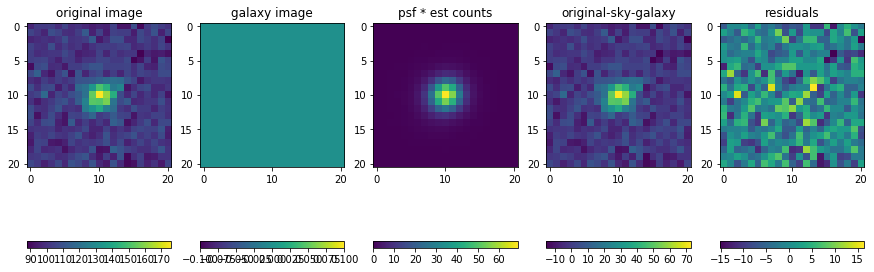

time 3


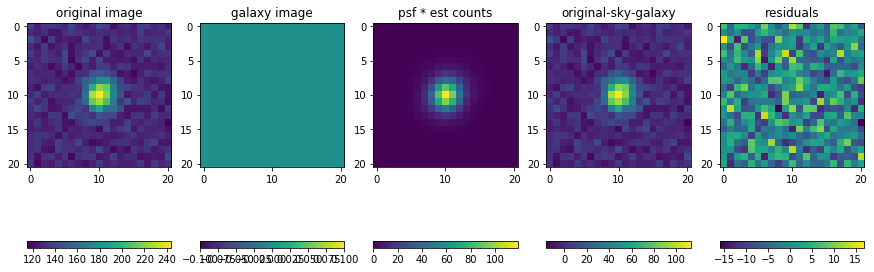

time 4


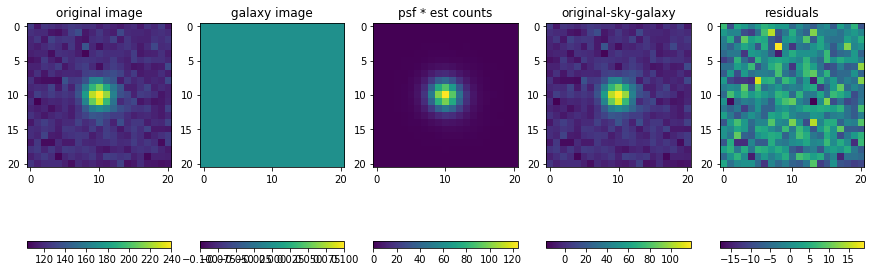

time 5


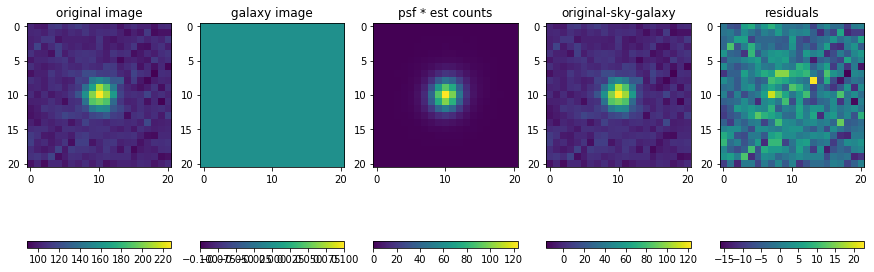

time 6


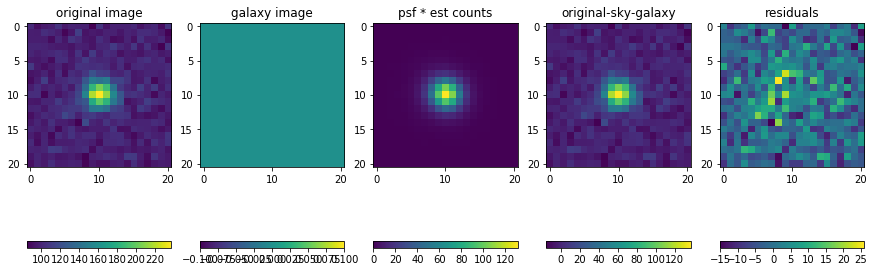

time 7


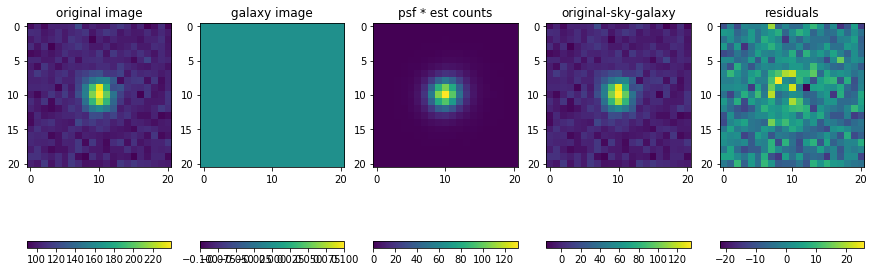

time 8


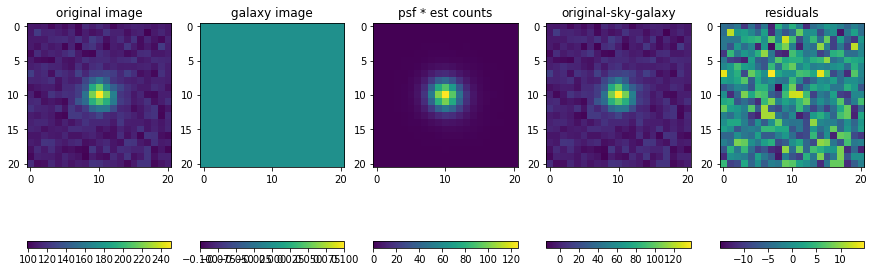

time 9


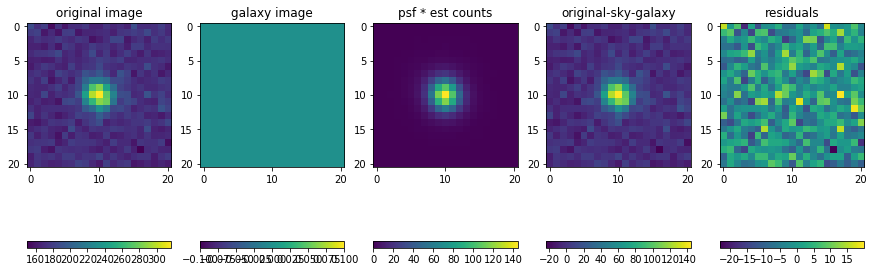

time 10


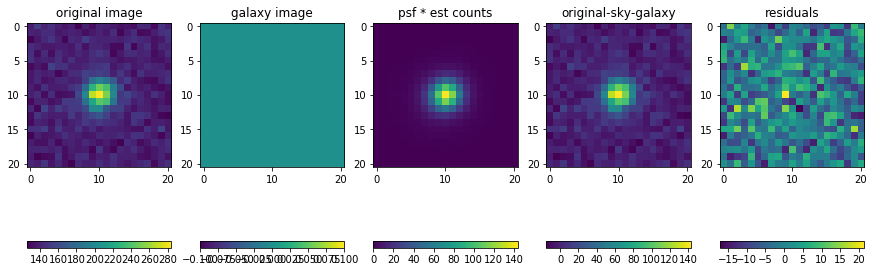

time 11


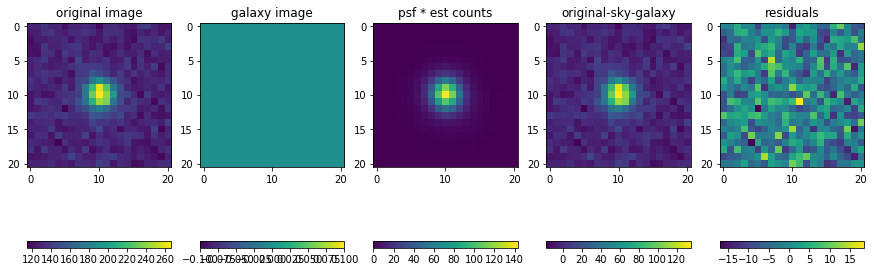

time 12


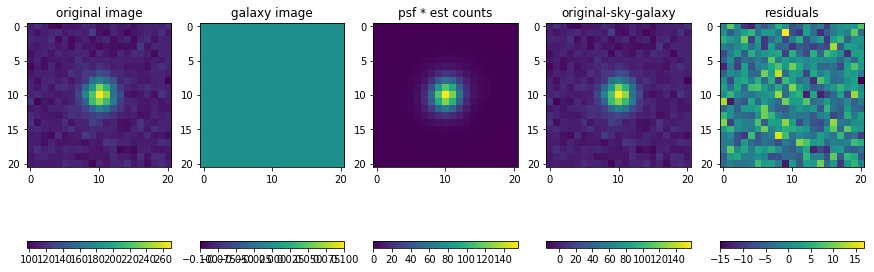

time 13


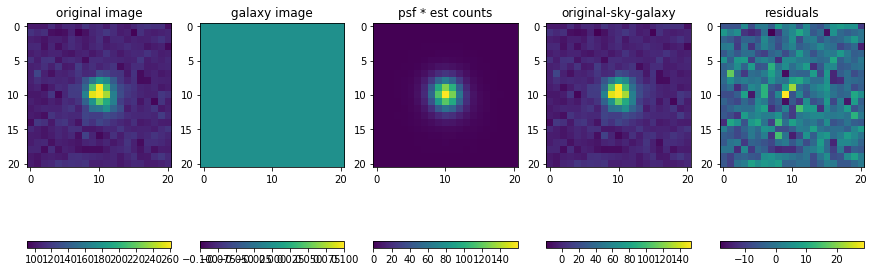

time 14


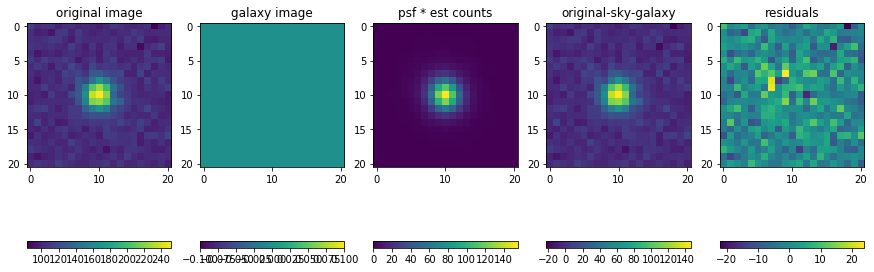

time 15


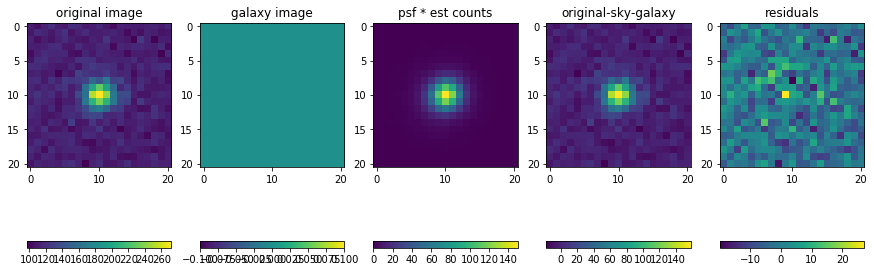

time 16


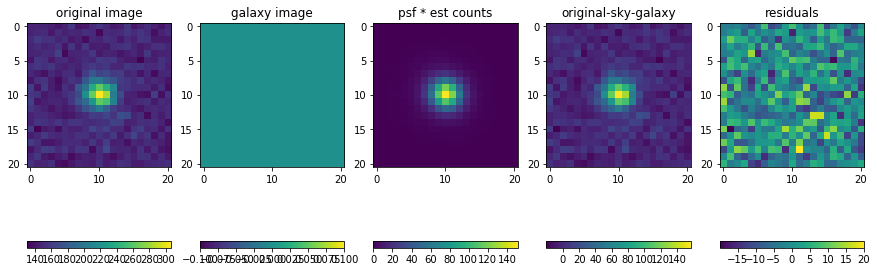

time 17


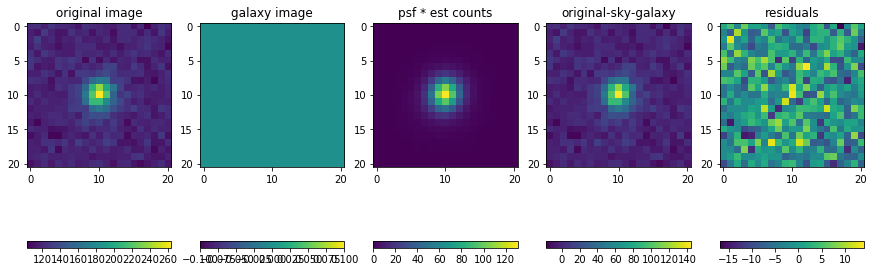

time 18


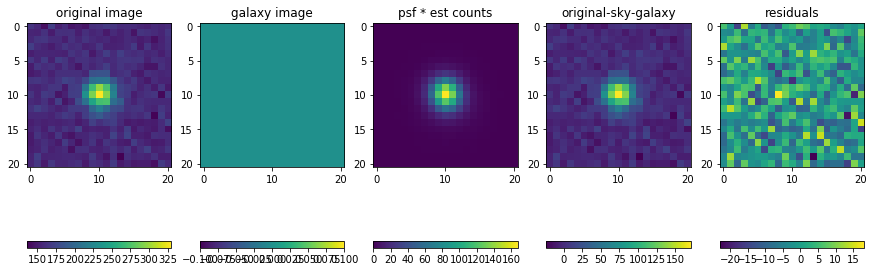

time 19


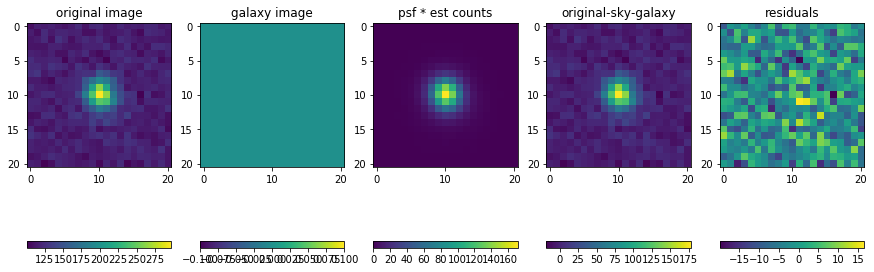

time 20


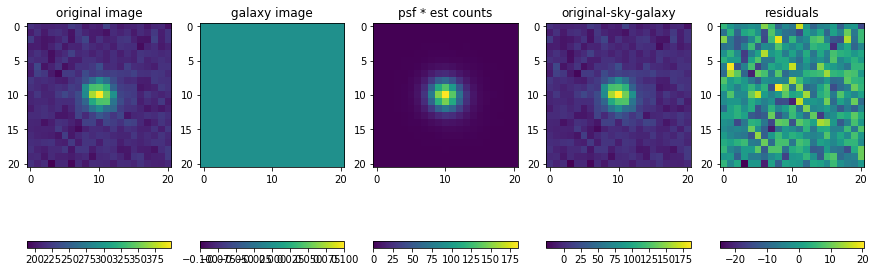

time 21


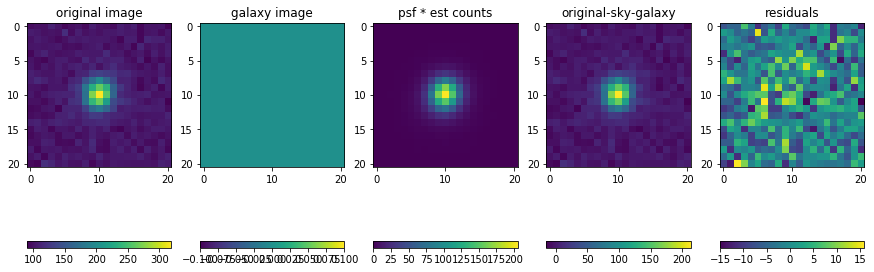

time 22


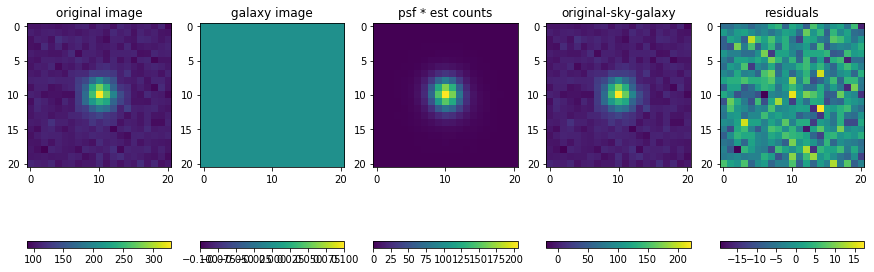

time 23


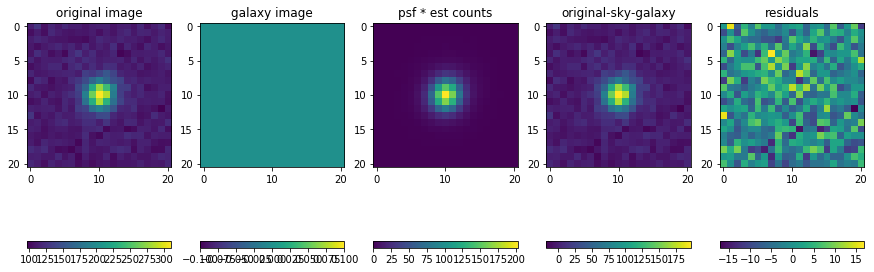

time 24


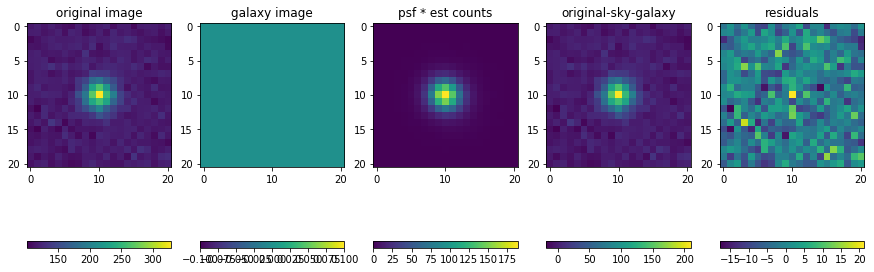

time 25


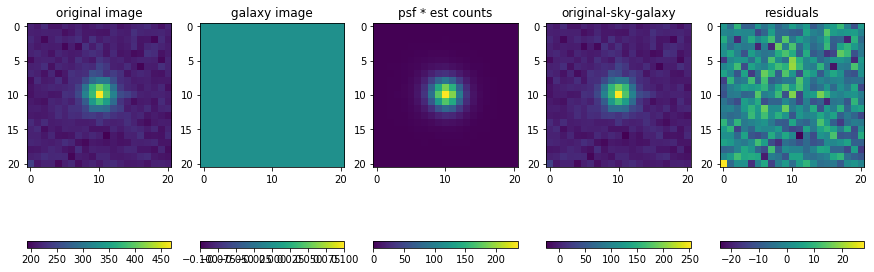

time 26


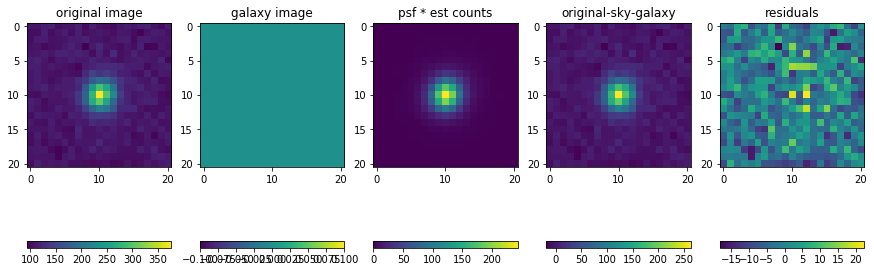

time 27


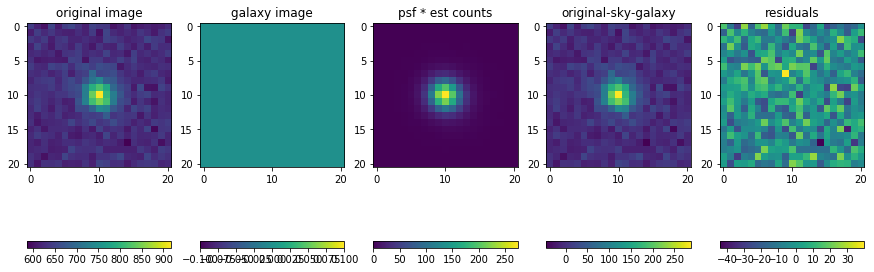

time 28


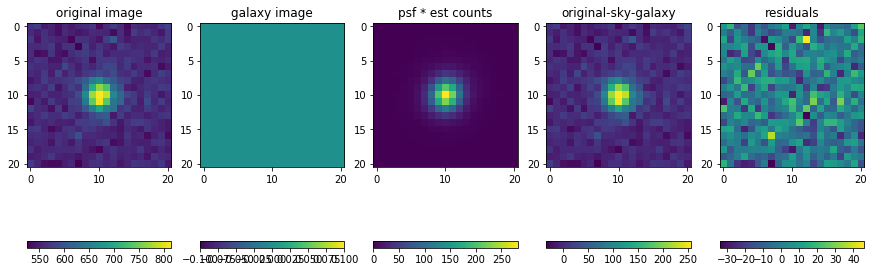

In [7]:
plt.figure(figsize=(12,7))
print("estimated values")
print(str(np.round(est_lc)))
print("estimated variance")
print(np.sqrt(est_variance))
print("simulated values")
print(example_data["count_lightcurves"])
plt.errorbar(days, est_lc, fmt="-o", yerr=2*np.sqrt(est_variance), label="estimated")
plt.plot(days, example_data["count_lightcurves"], "-o", label="simulated")
plt.legend()
plt.show()
for i, count in enumerate(est_lc):
    print("time "+str(i))
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 9))
    cax1 = ax1.imshow(example_data["images"][..., i])
    cbar1 = f.colorbar(cax1, ax=ax1, orientation='horizontal')
    ax1.set_title("original image")
    cax2 = ax2.imshow(example_data["galaxy_image"][..., i])
    cbar2 = f.colorbar(cax2, ax=ax2, orientation='horizontal')
    ax2.set_title("galaxy image")
    cax3 = ax3.imshow(example_data["psf_image"][..., i]*est_lc[i])
    cbar3 = f.colorbar(cax3, ax=ax3, orientation='horizontal')
    ax3.set_title("psf * est counts")
    cax4 = ax4.imshow(clean[..., i])
    cbar4 = f.colorbar(cax4, ax=ax4, orientation='horizontal')
    ax4.set_title("original-sky-galaxy")
    cax5 = ax5.imshow(residuals[..., i])
    cbar5 = f.colorbar(cax5, ax=ax5, orientation='horizontal')
    ax5.set_title("residuals")
    plt.show()
    plt.close("all")

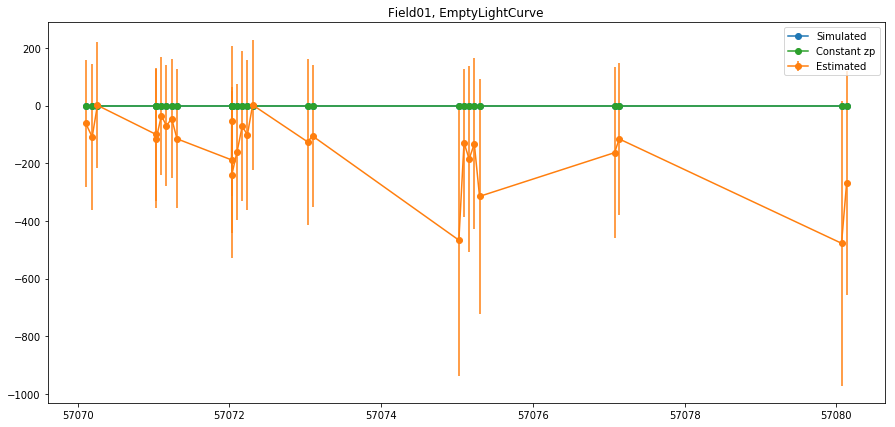

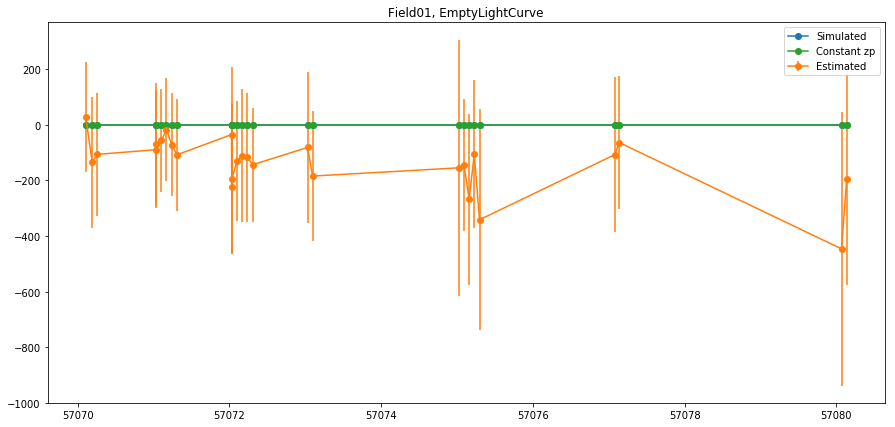

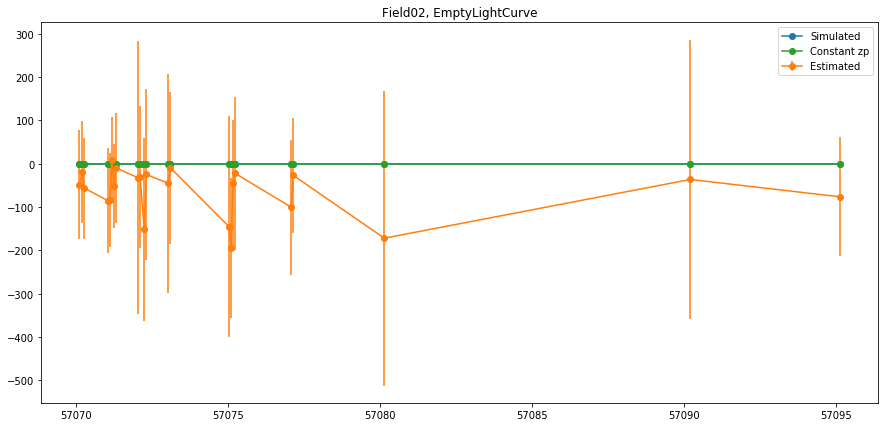

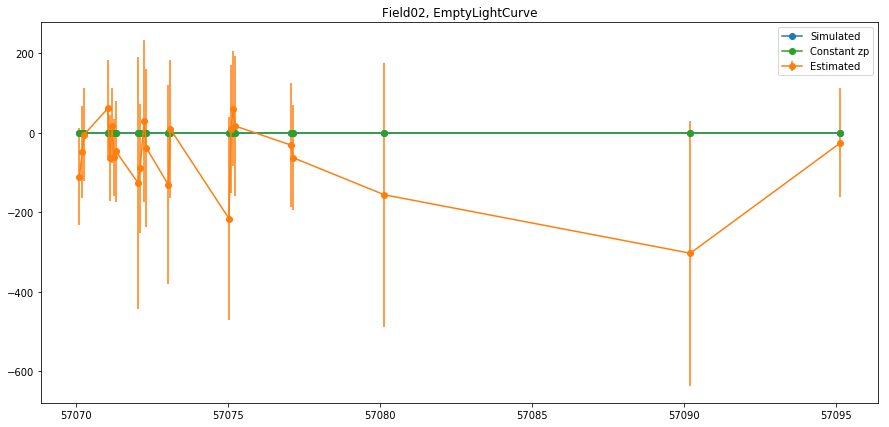

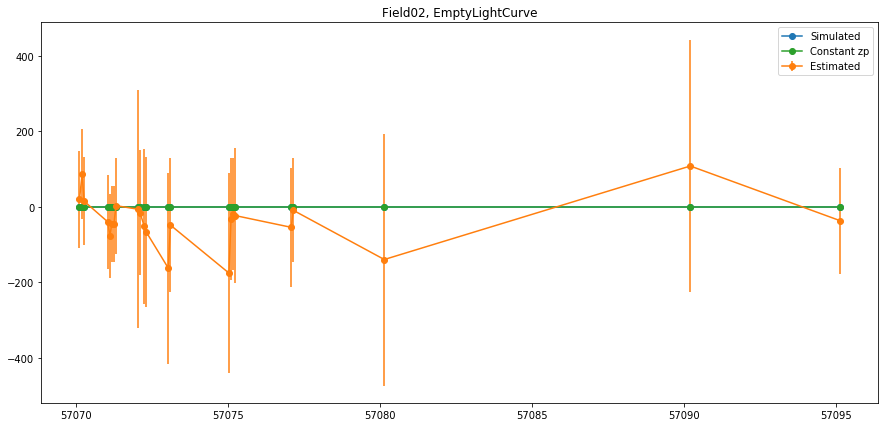

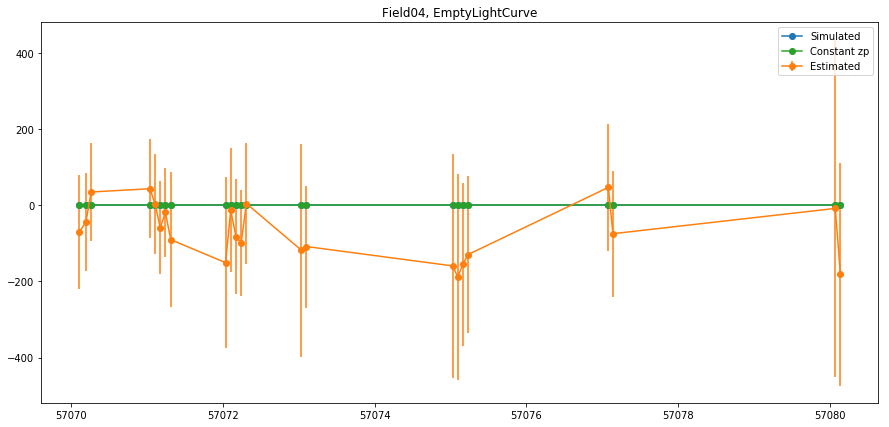

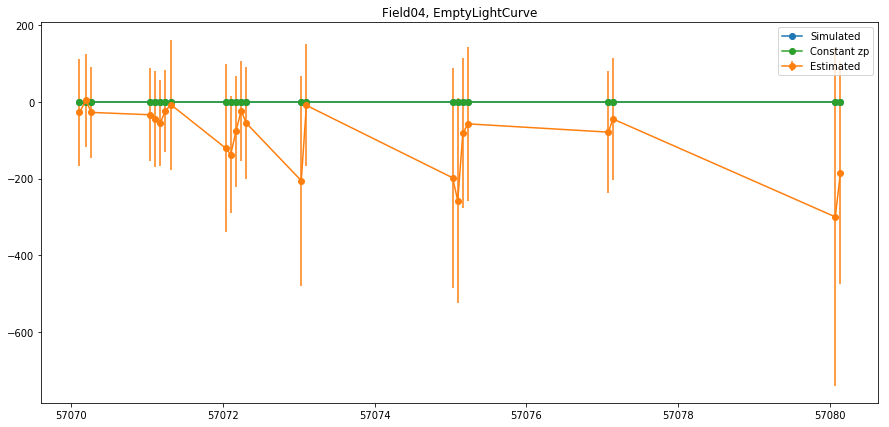

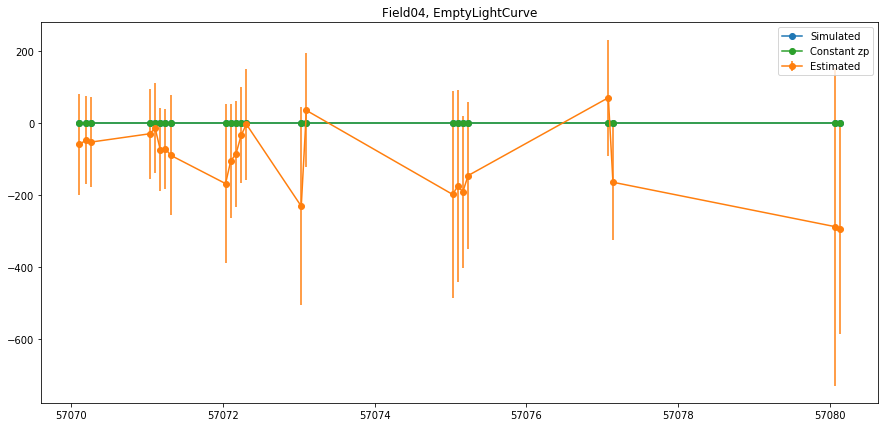

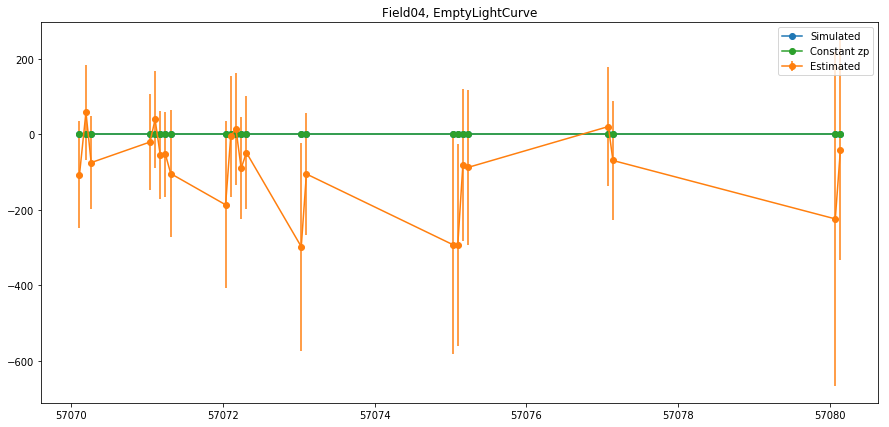

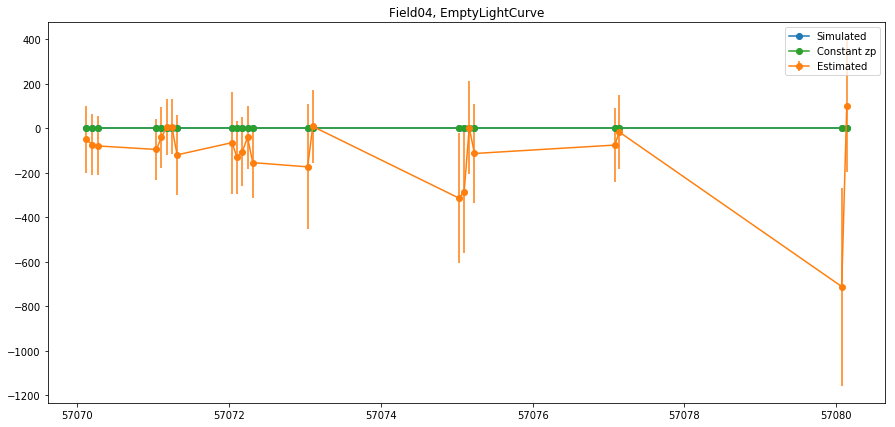

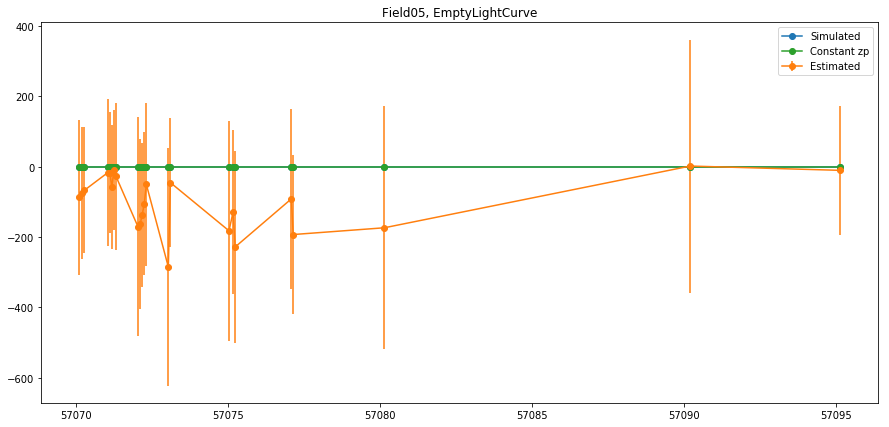

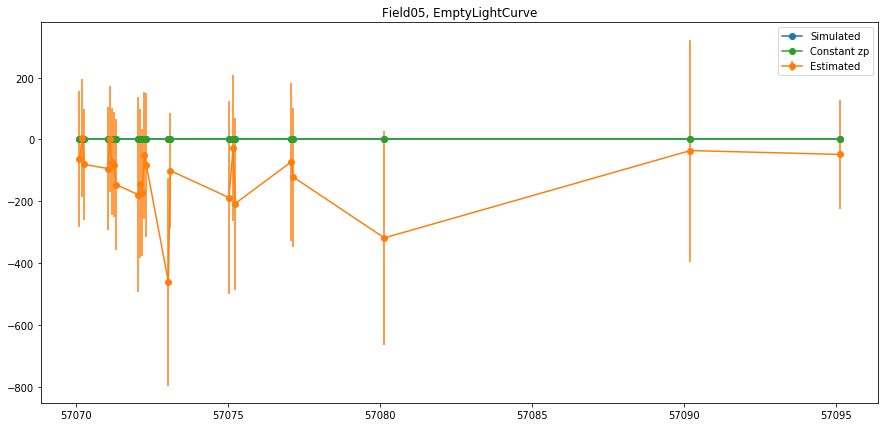

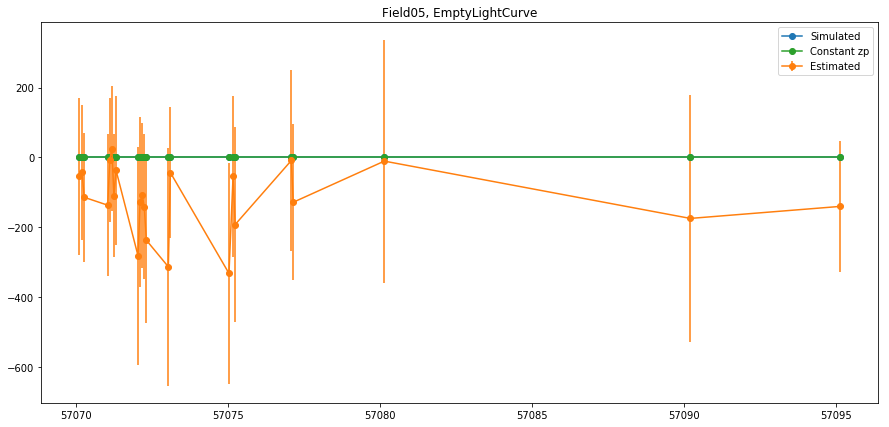

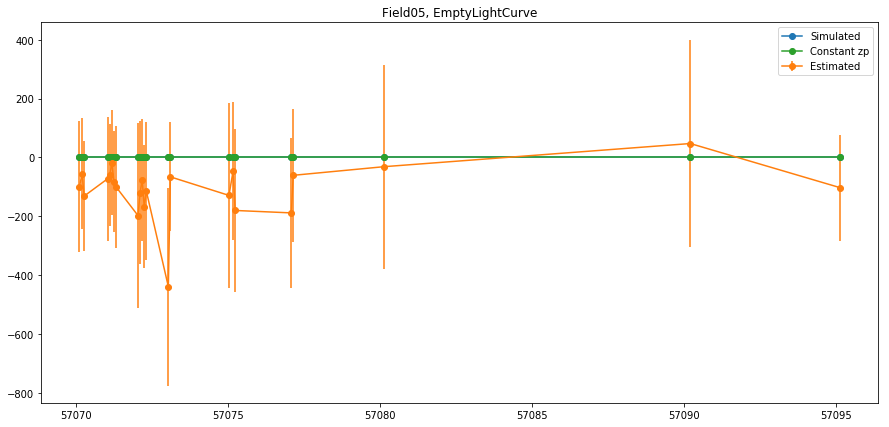

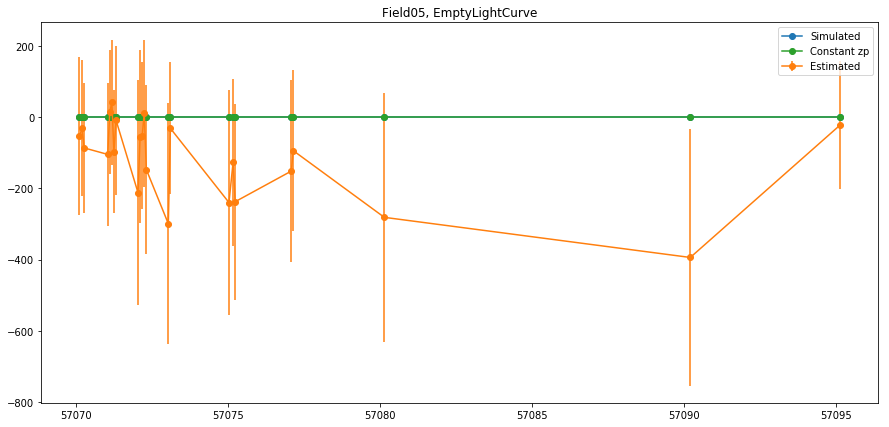

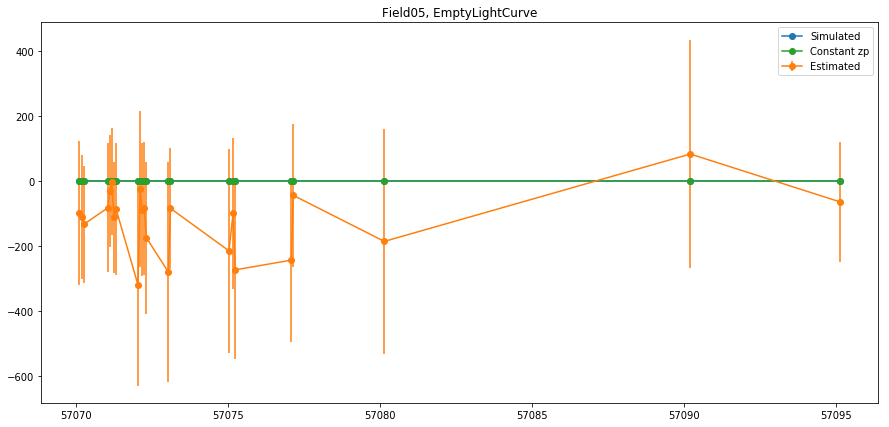

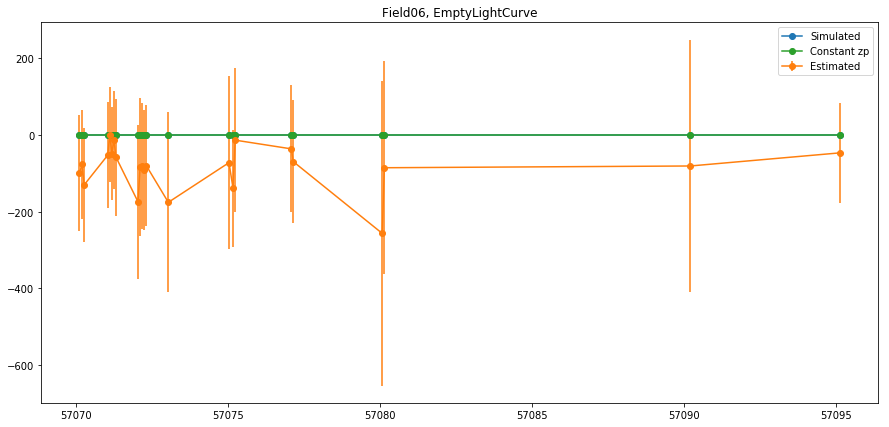

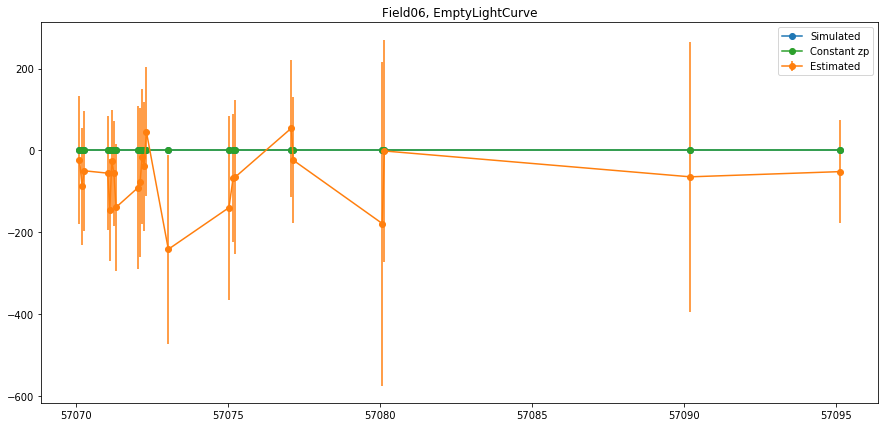

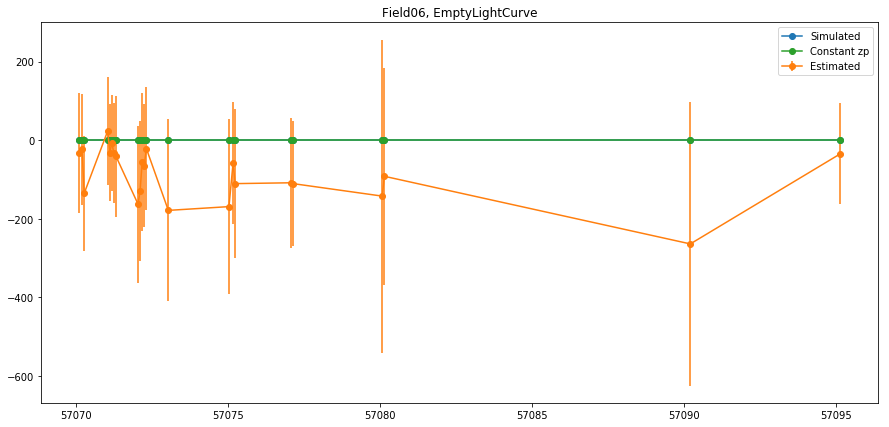

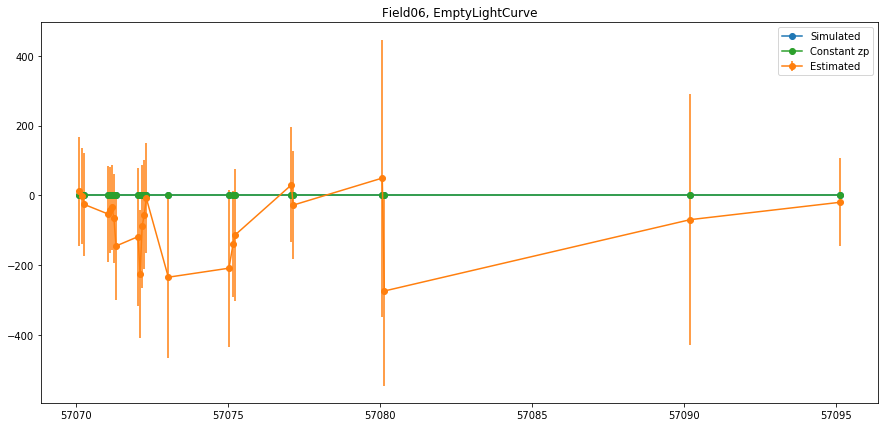

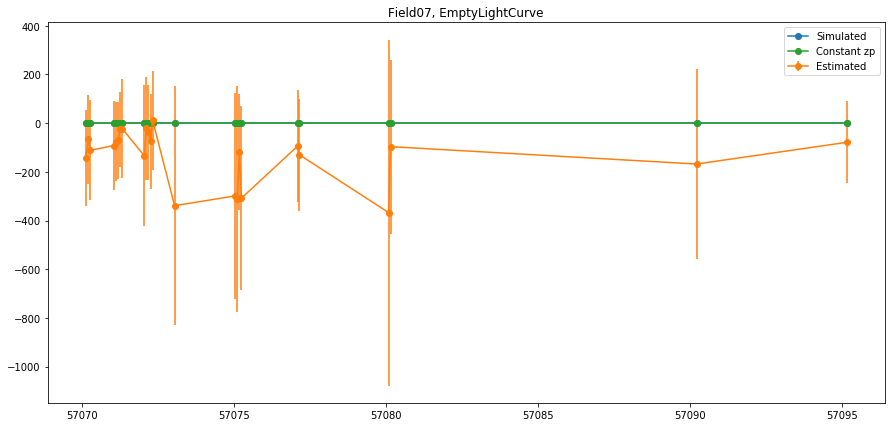

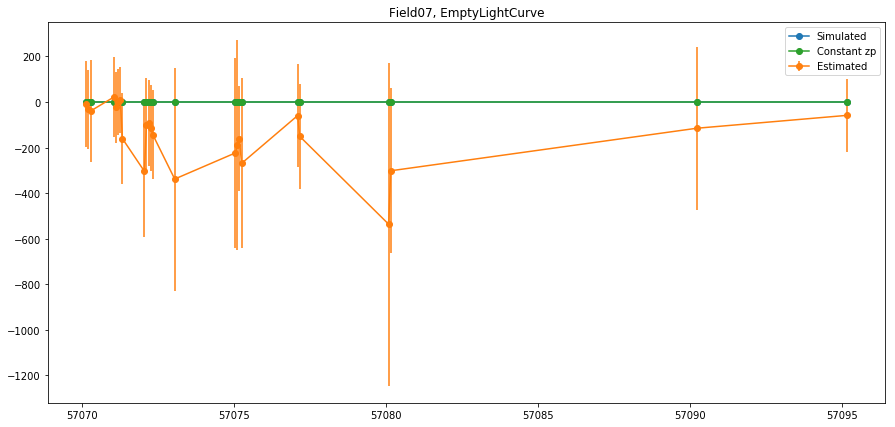

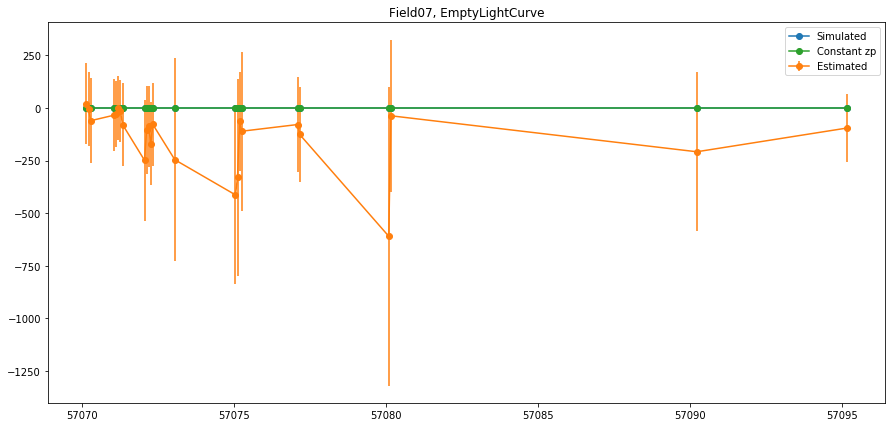

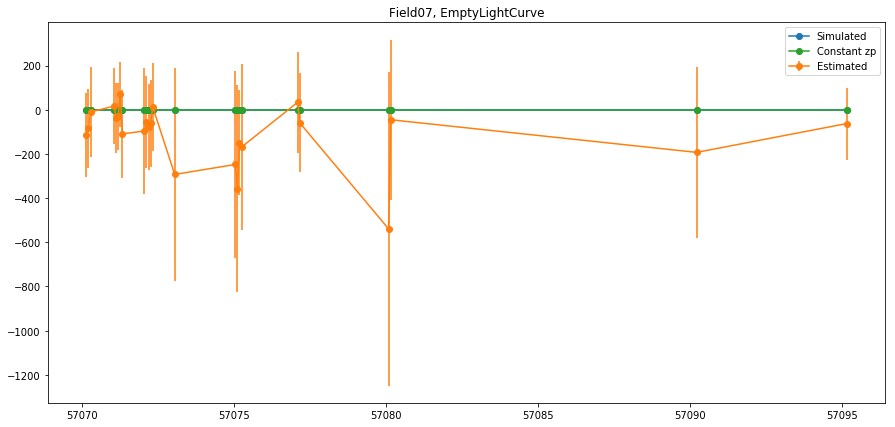

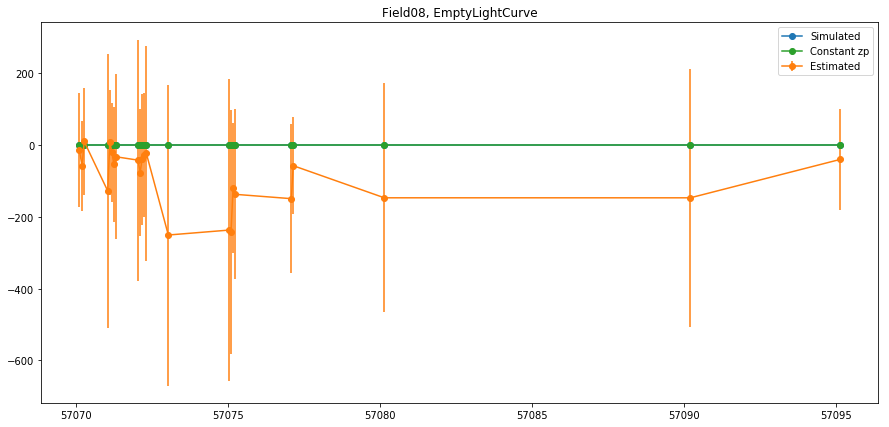

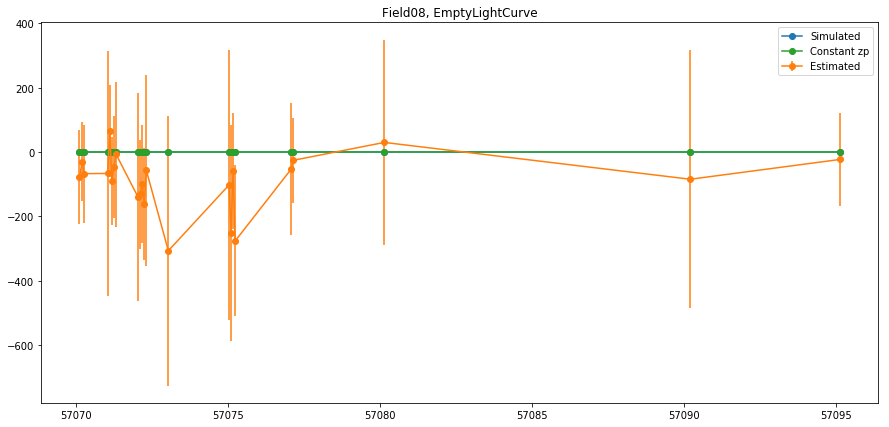

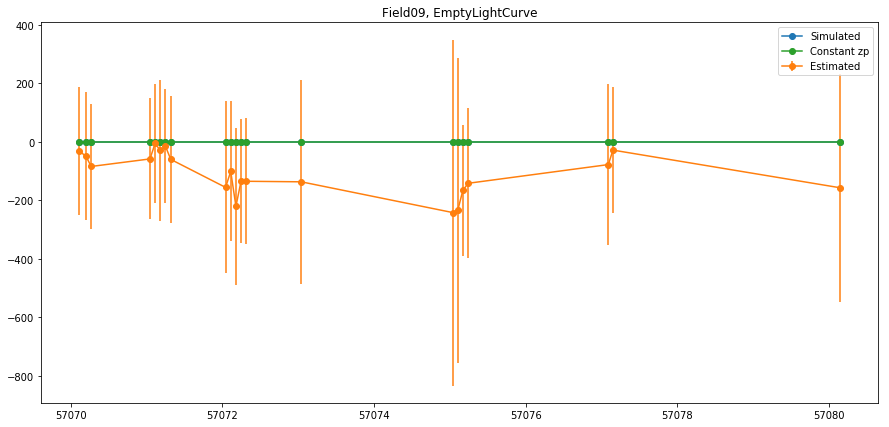

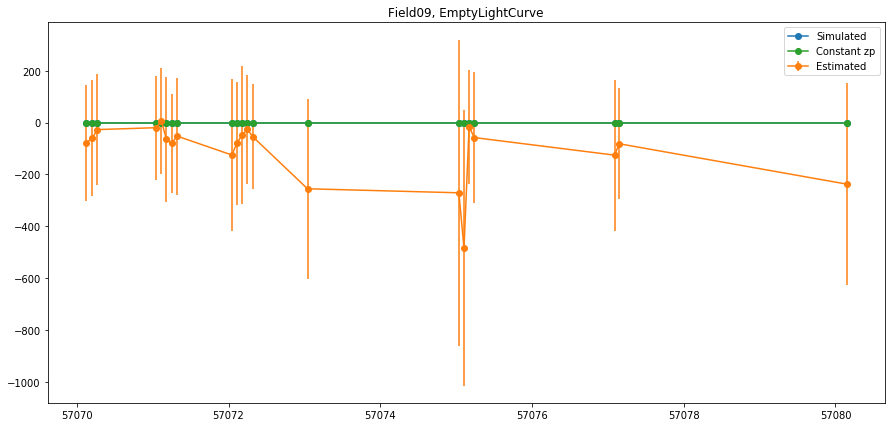

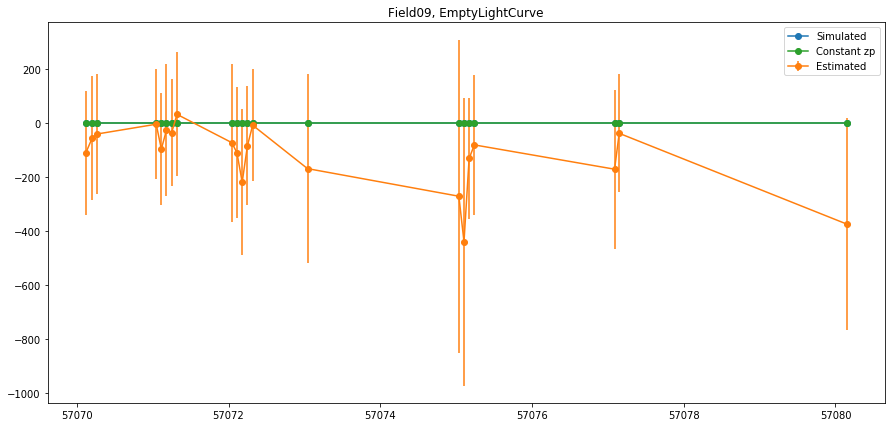

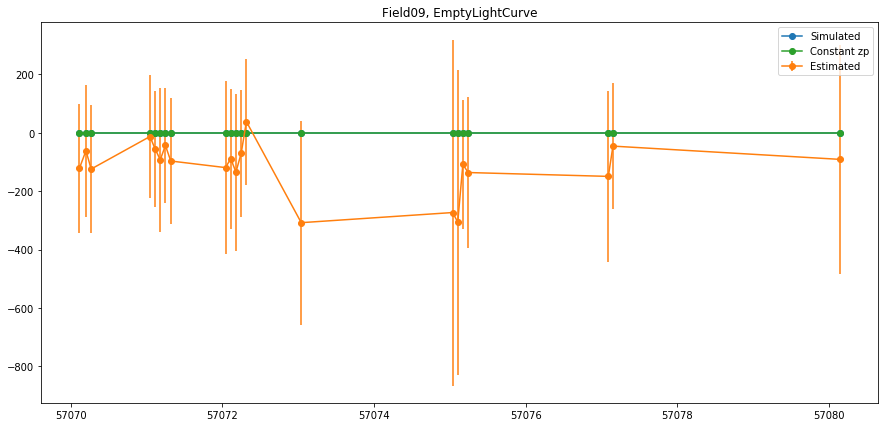

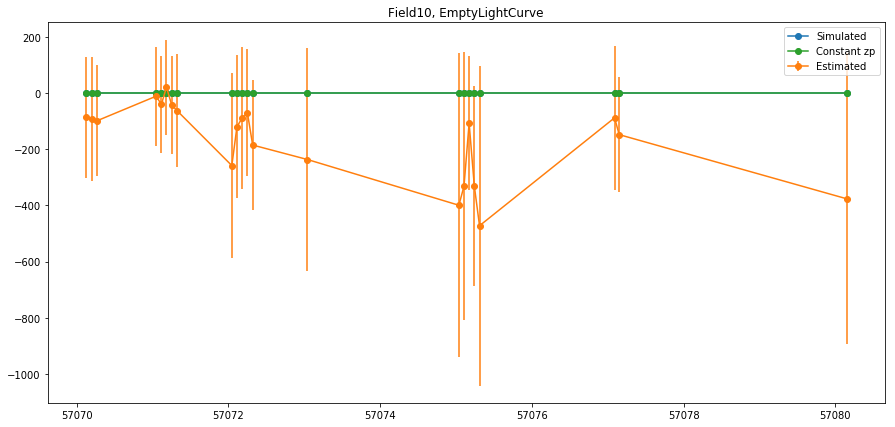

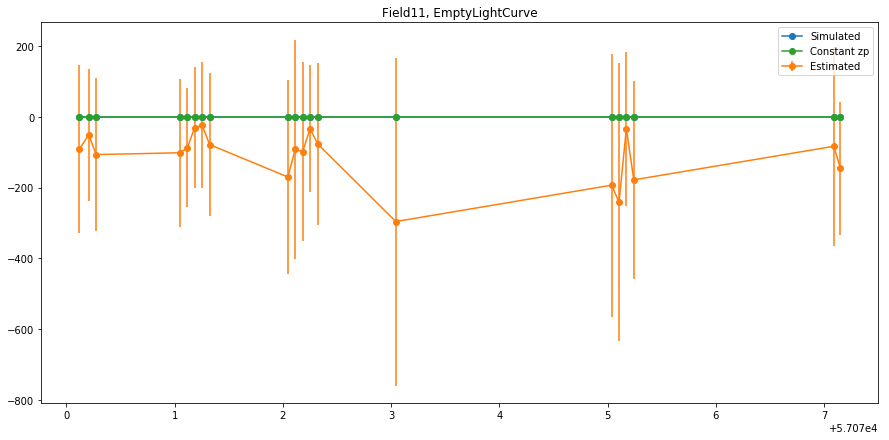

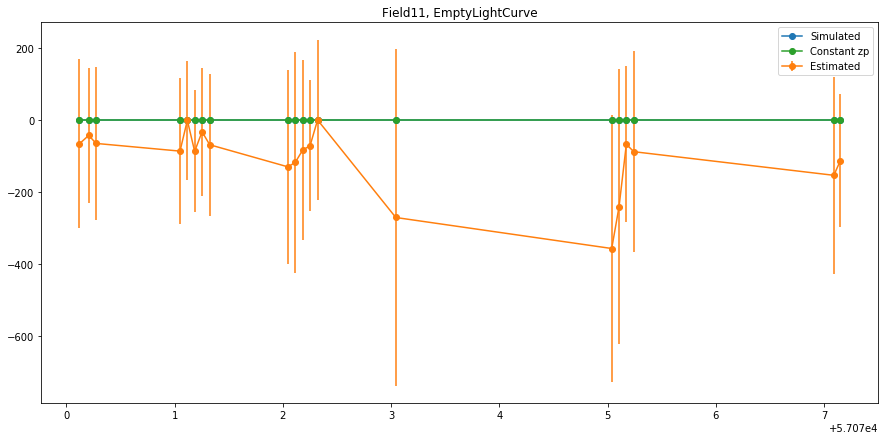

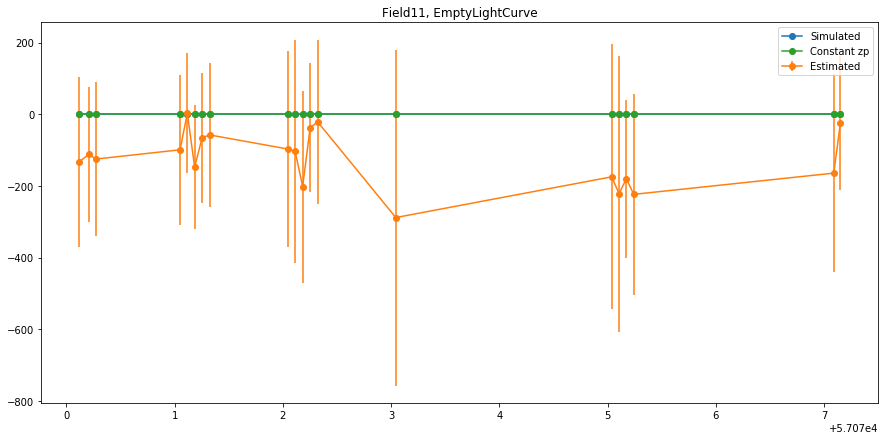

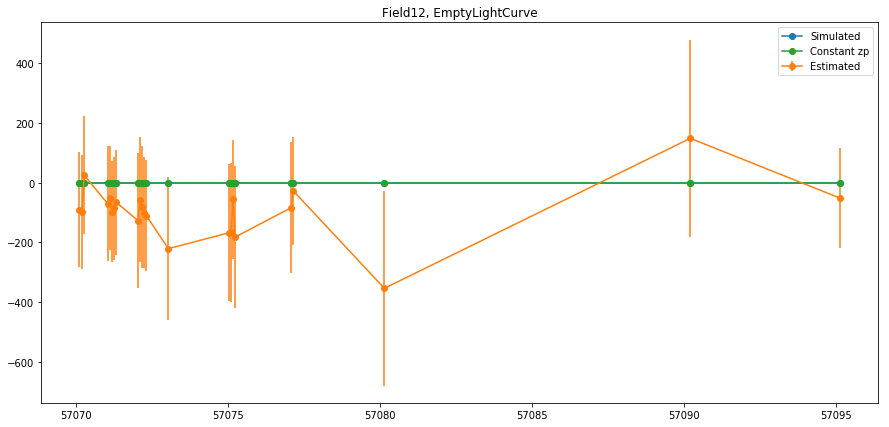

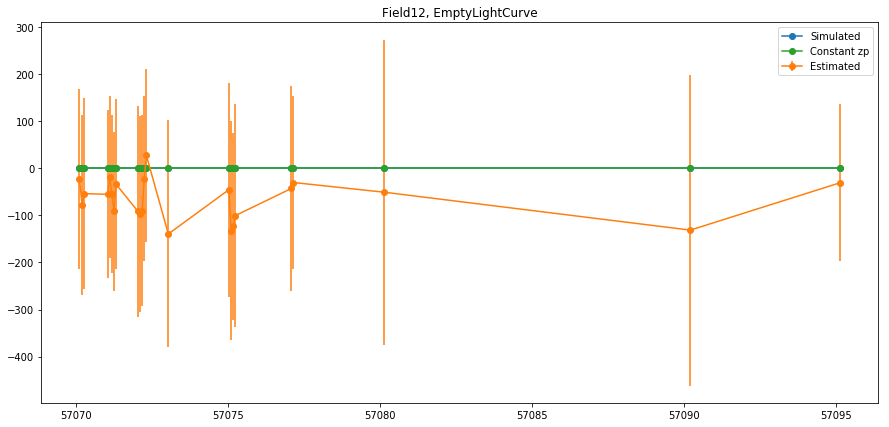

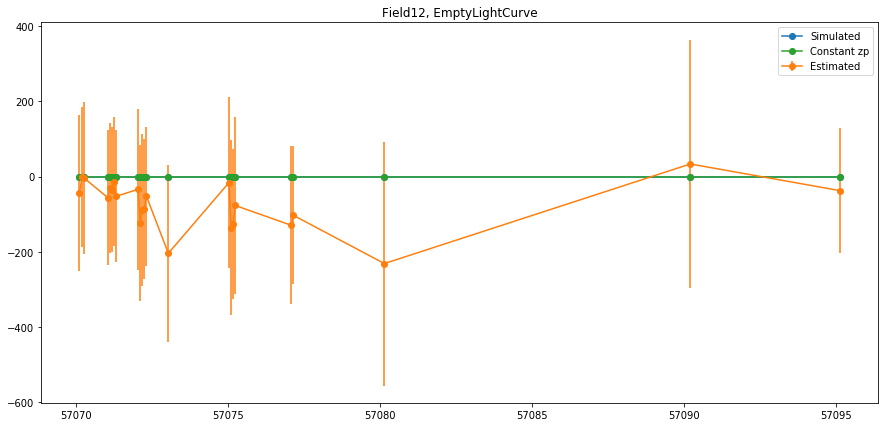

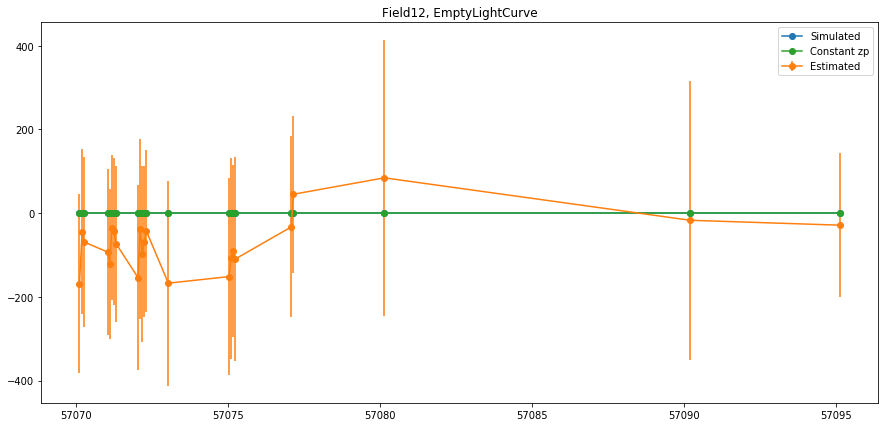

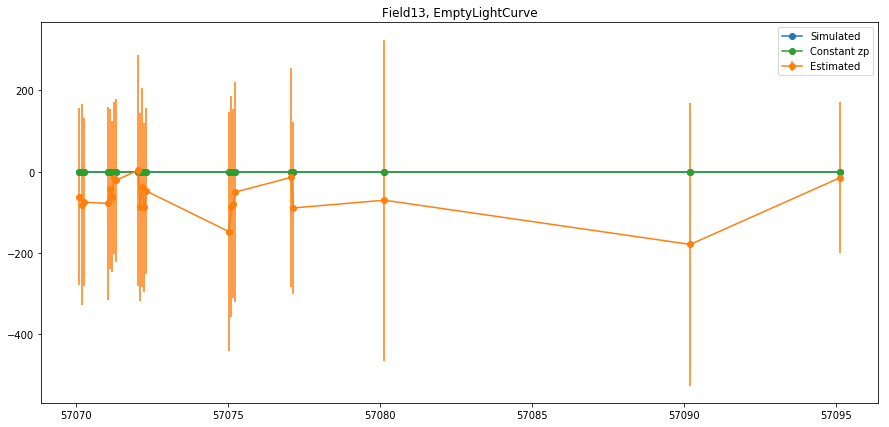

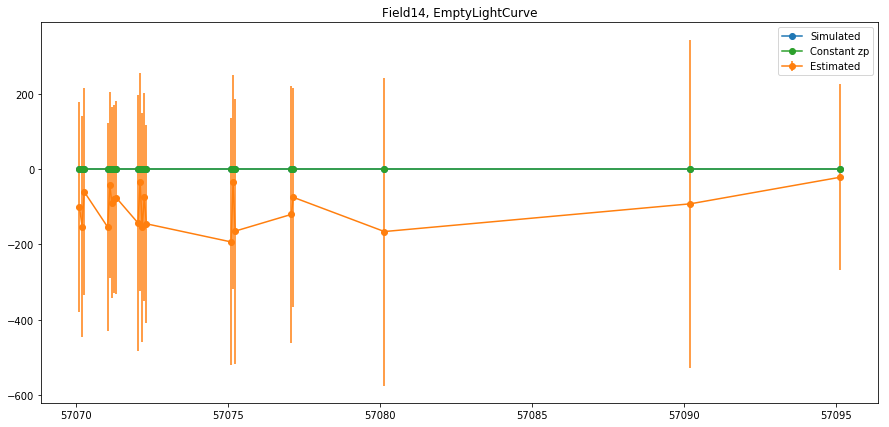

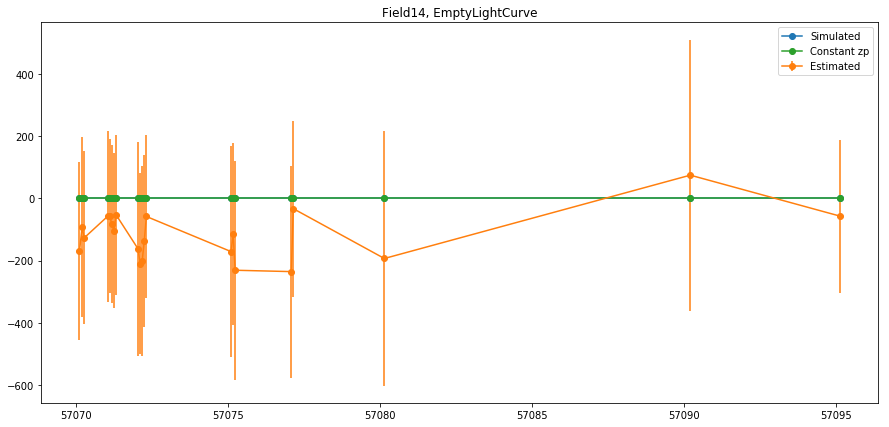

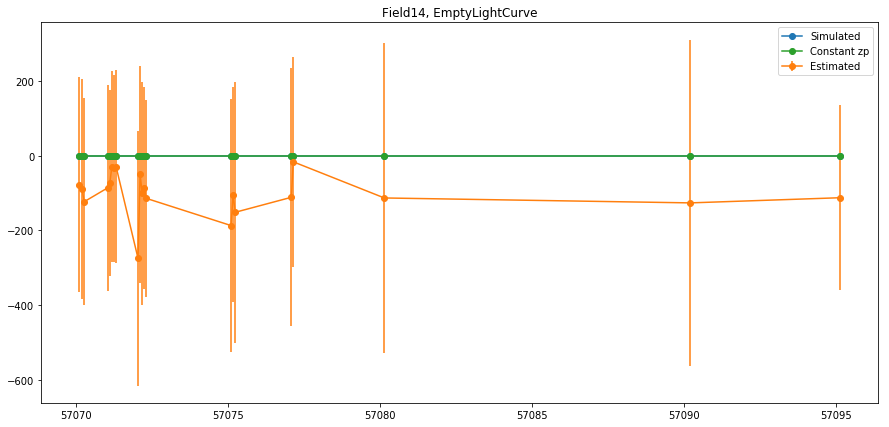

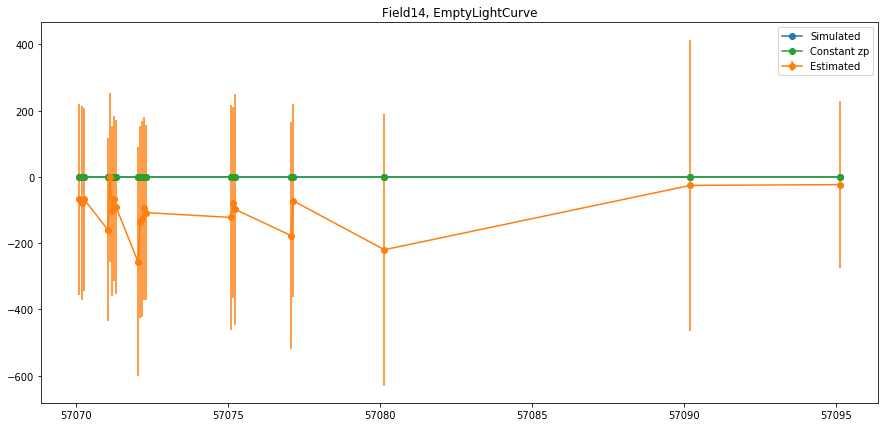

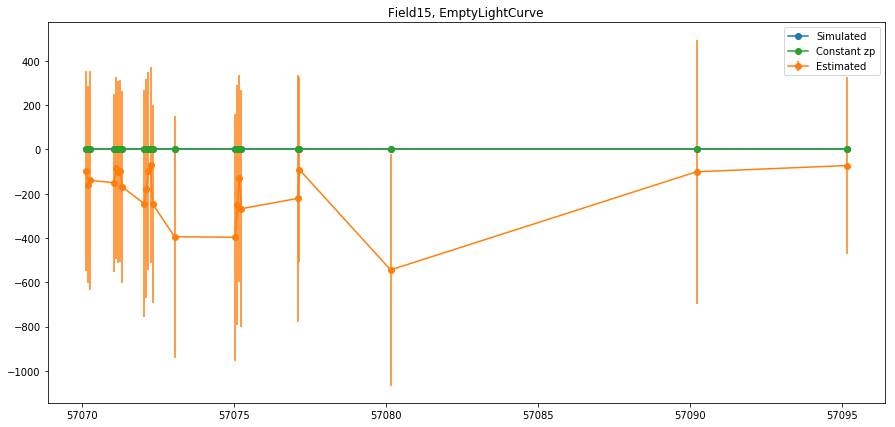

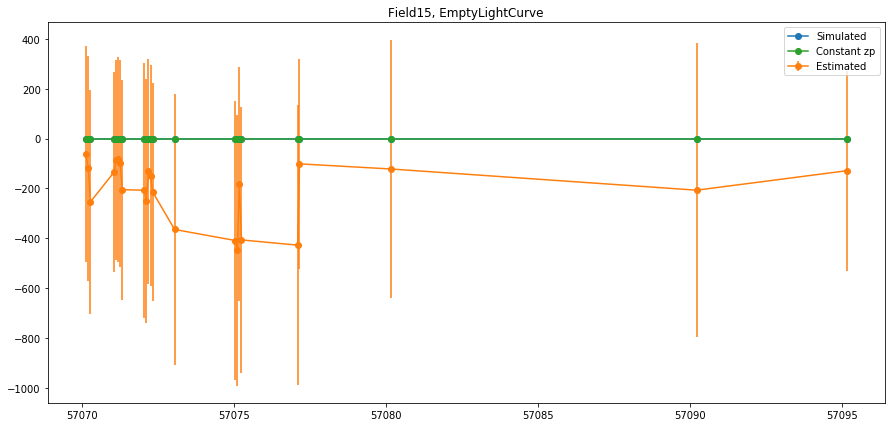

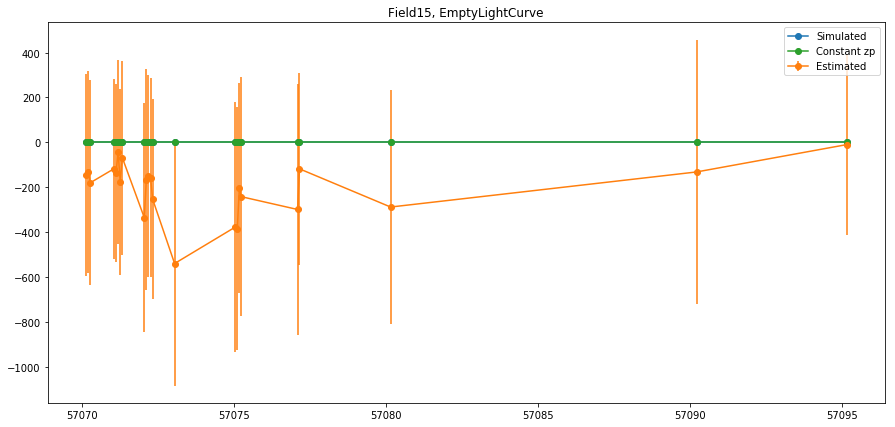

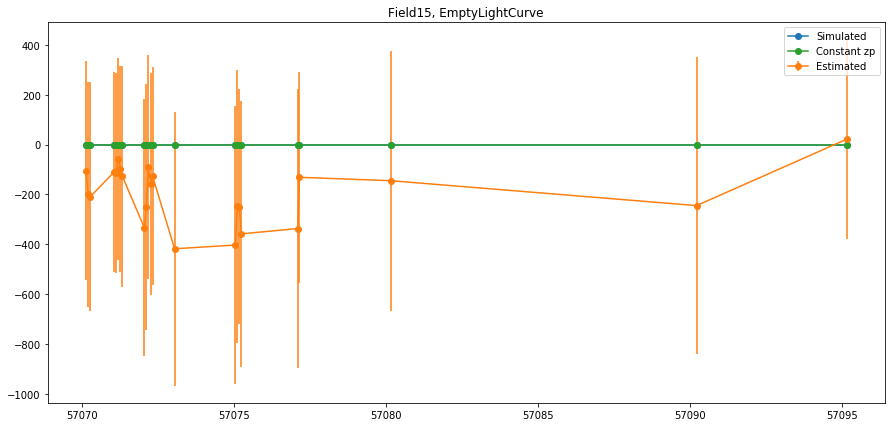

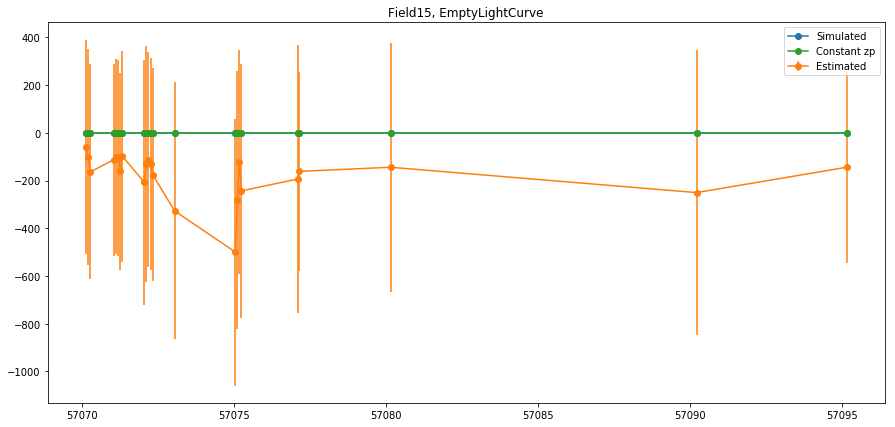

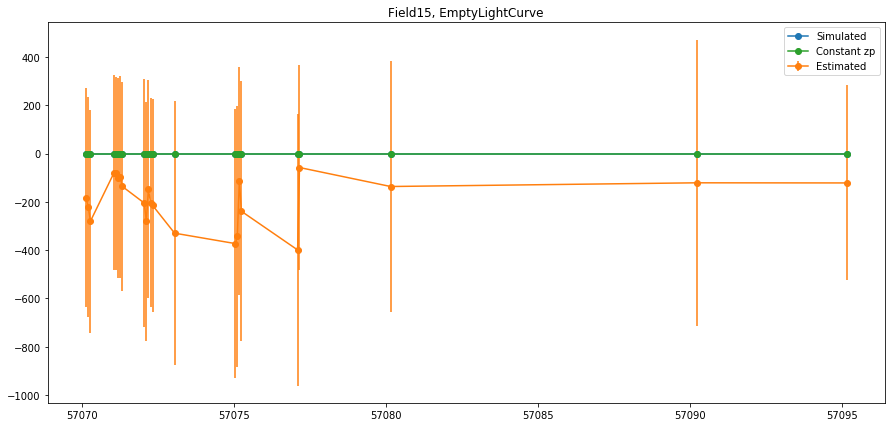

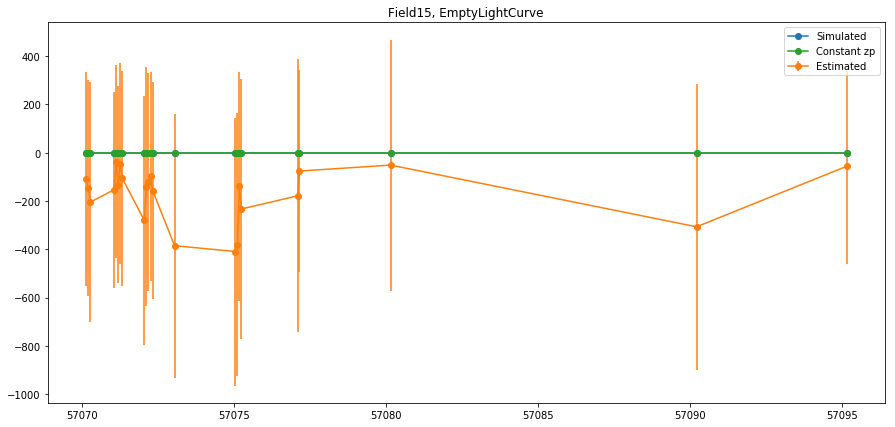

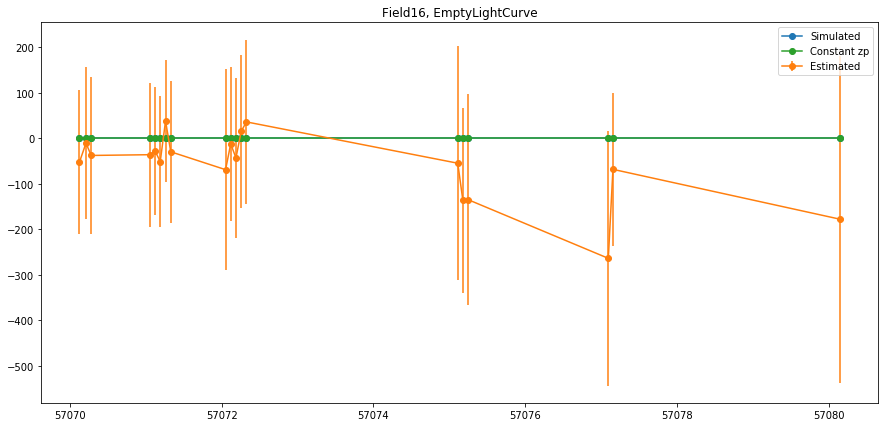

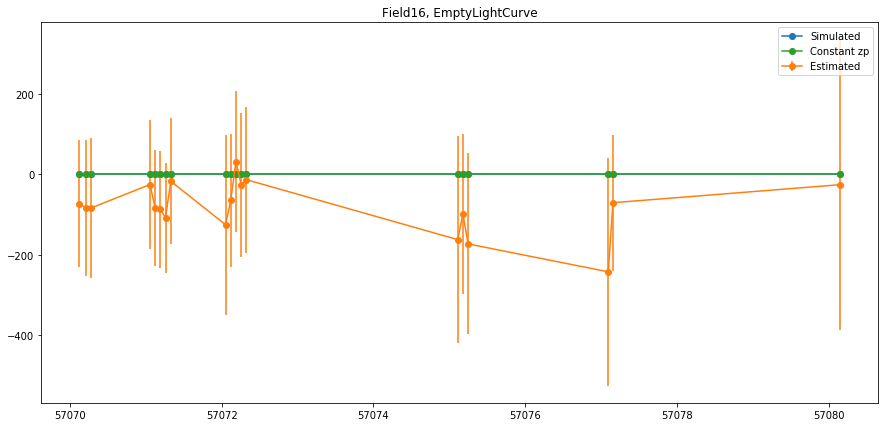

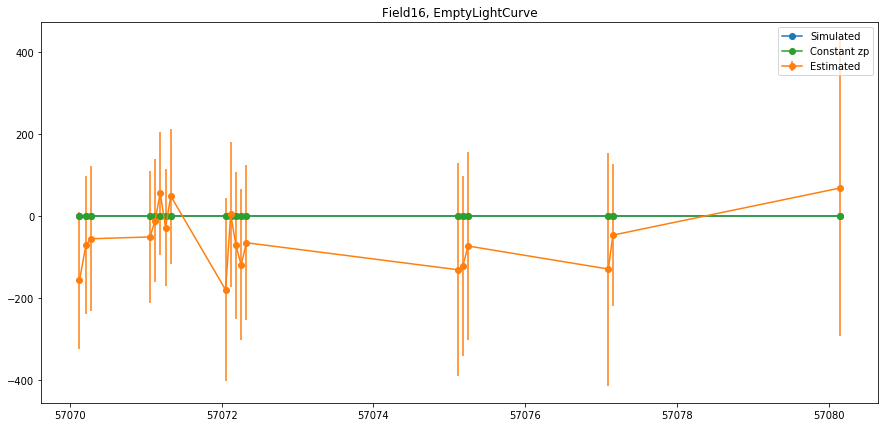

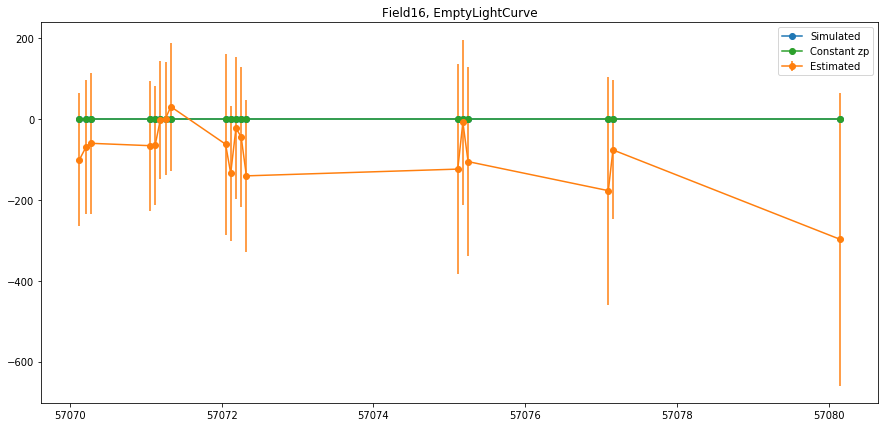

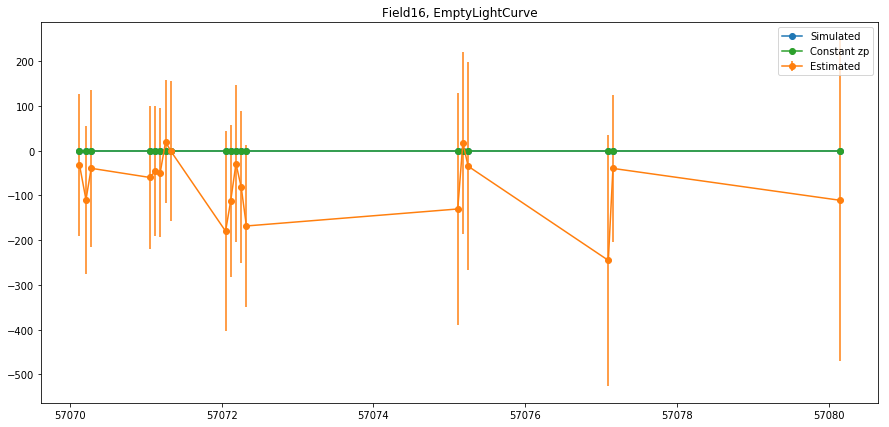

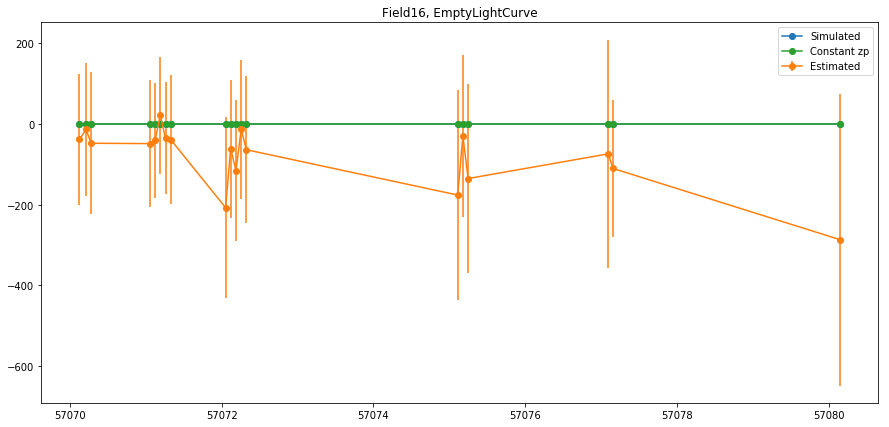

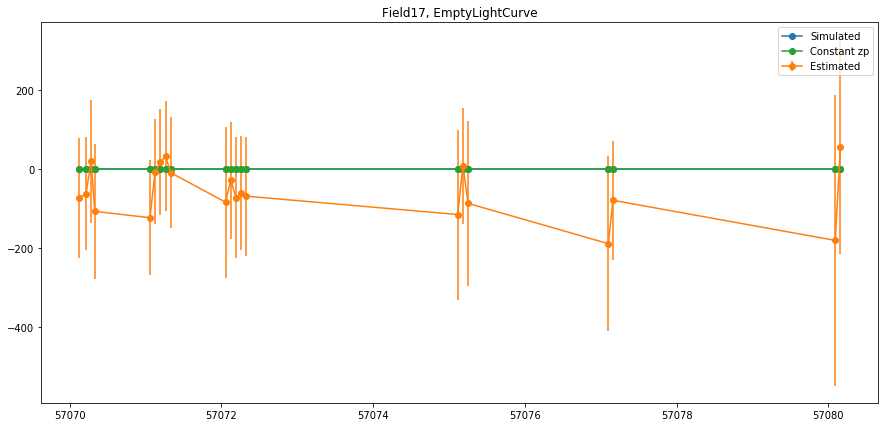

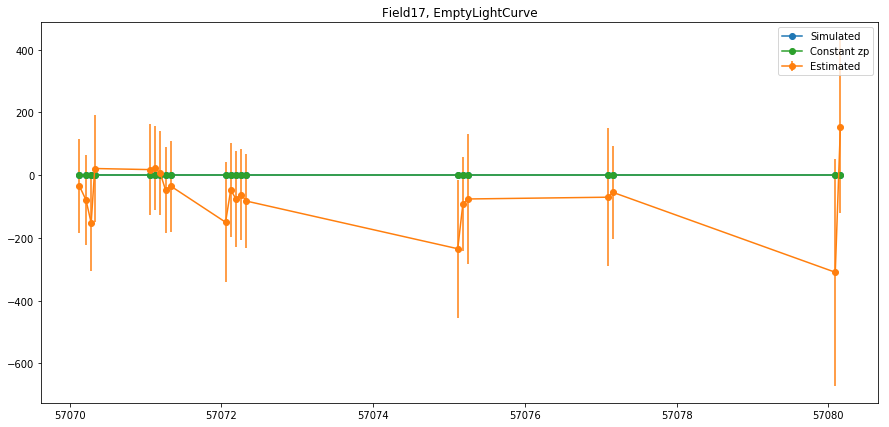

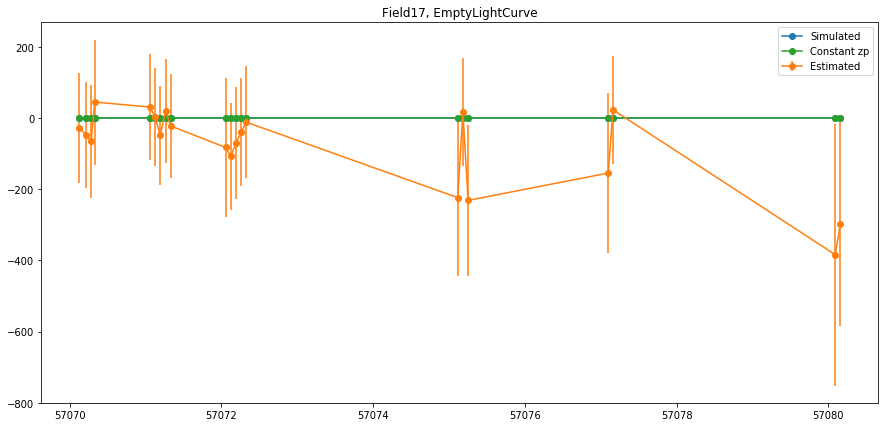

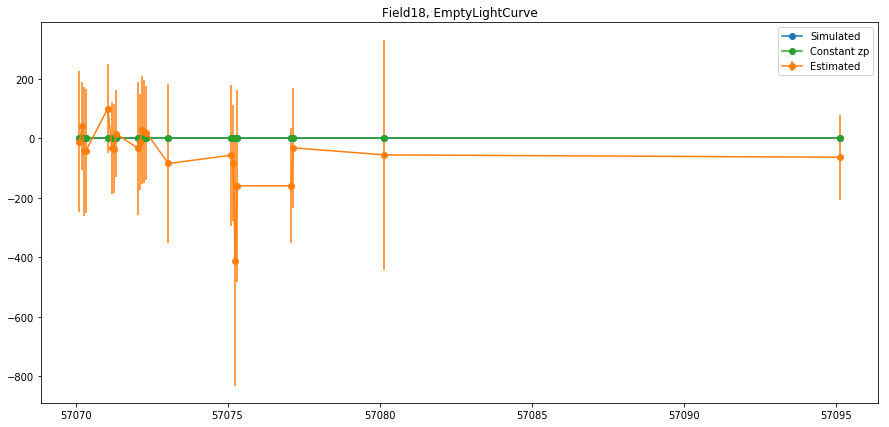

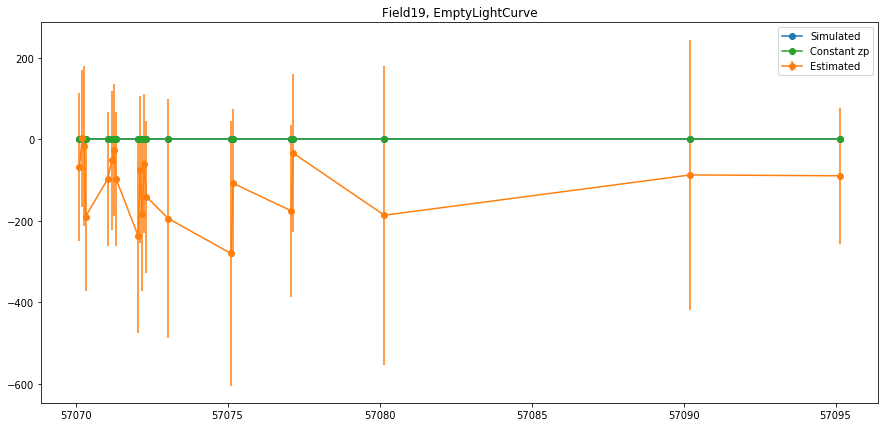

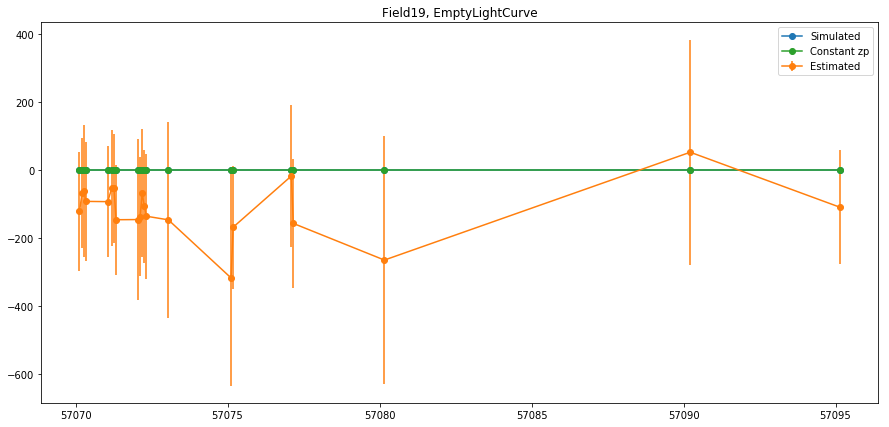

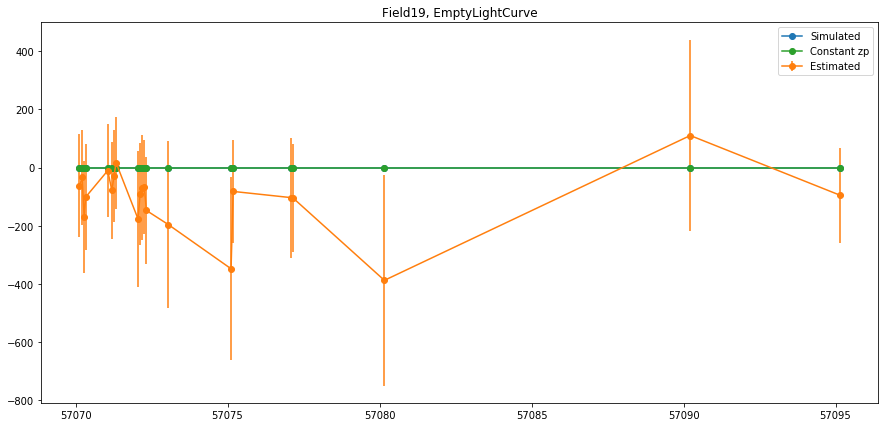

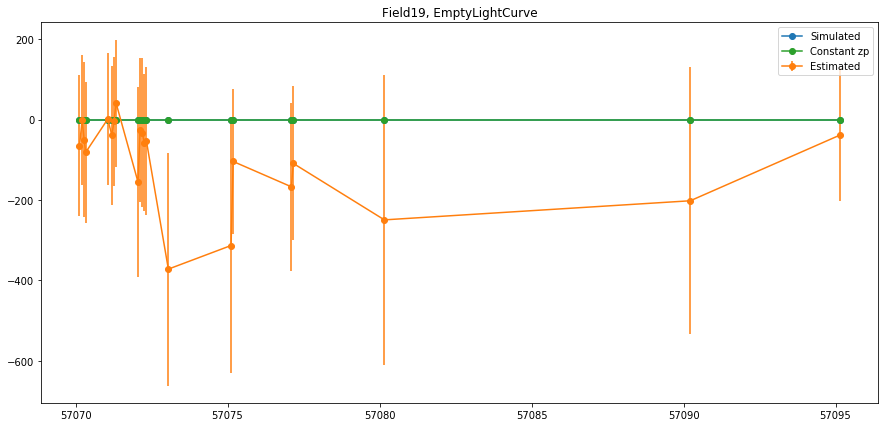

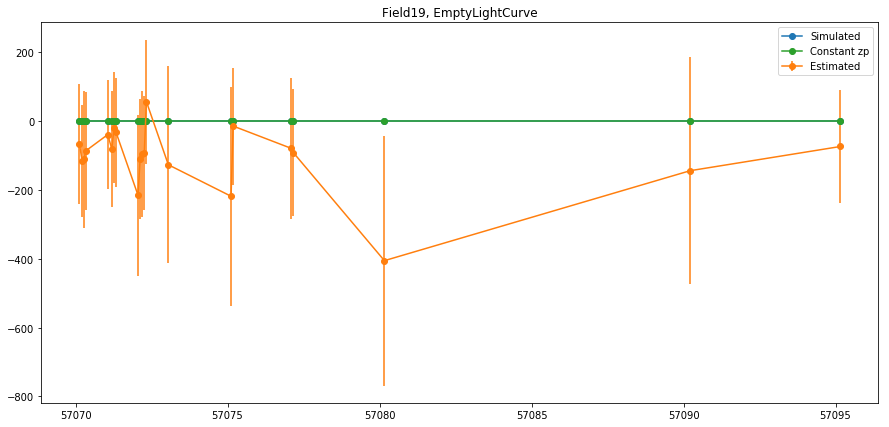

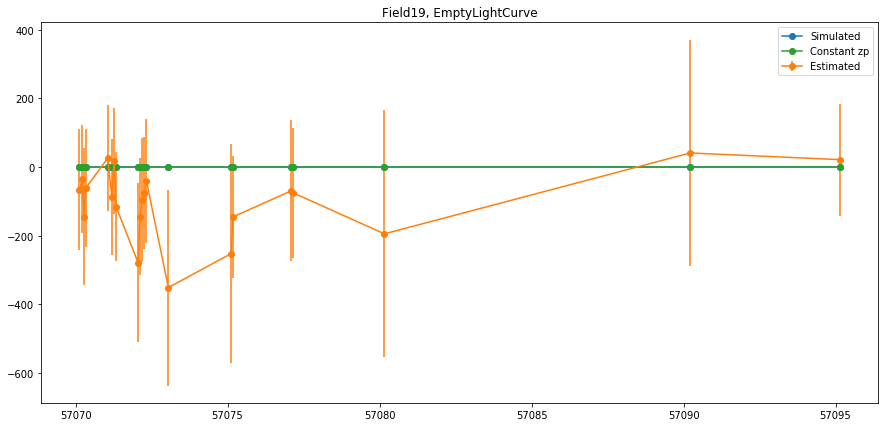

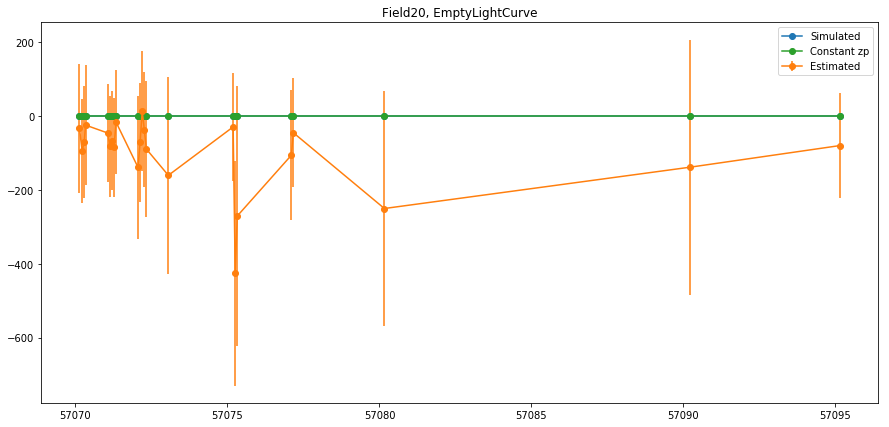

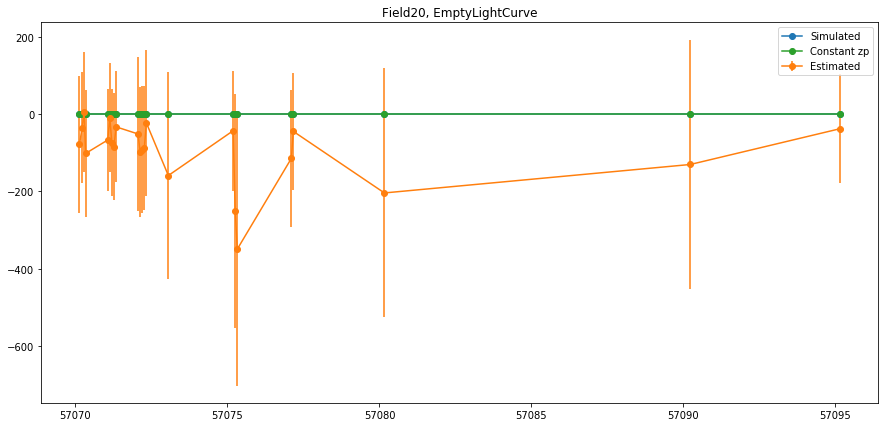

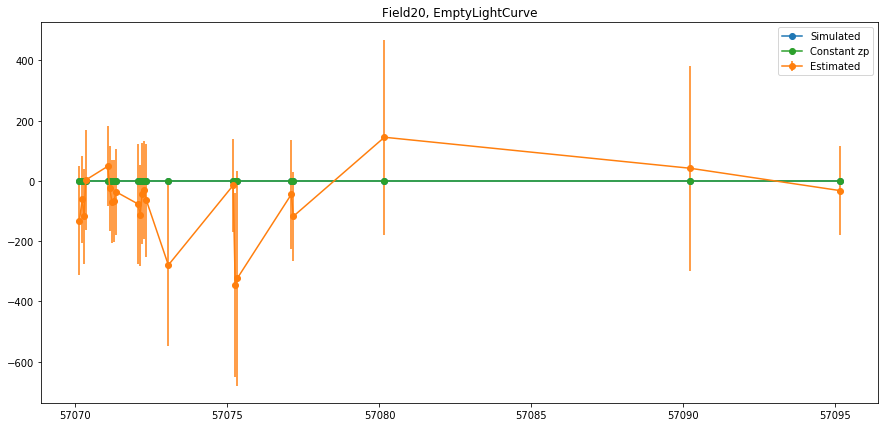

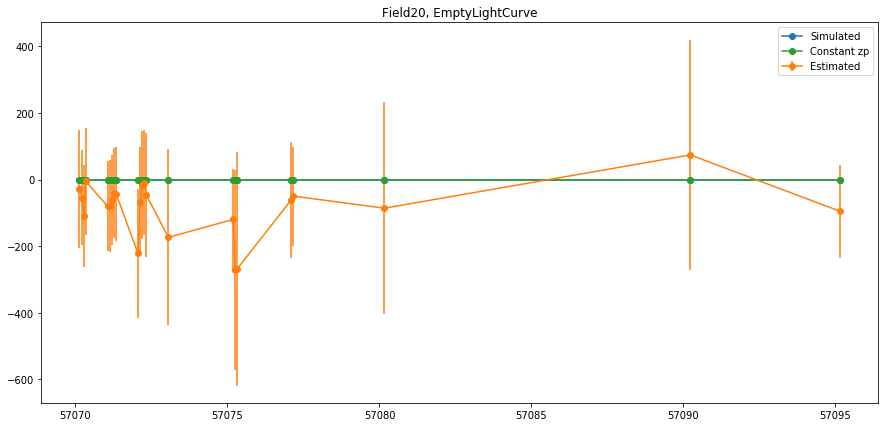

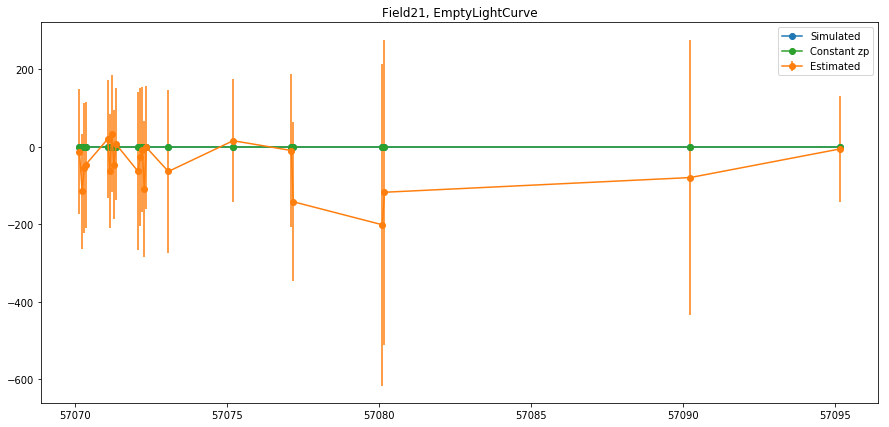

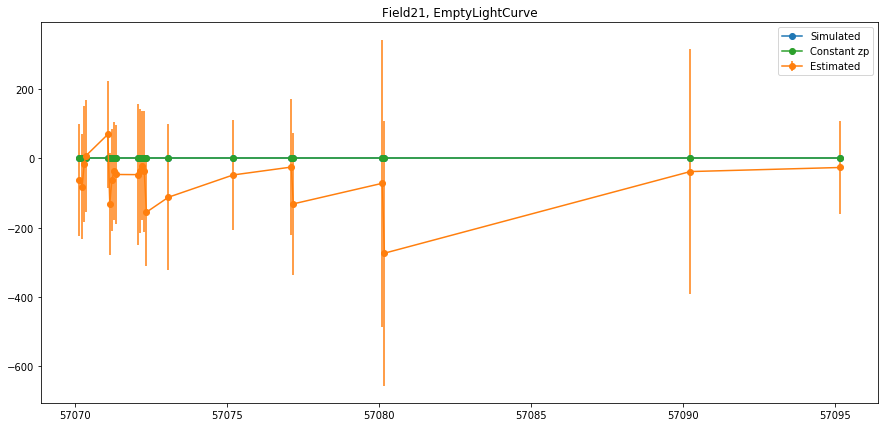

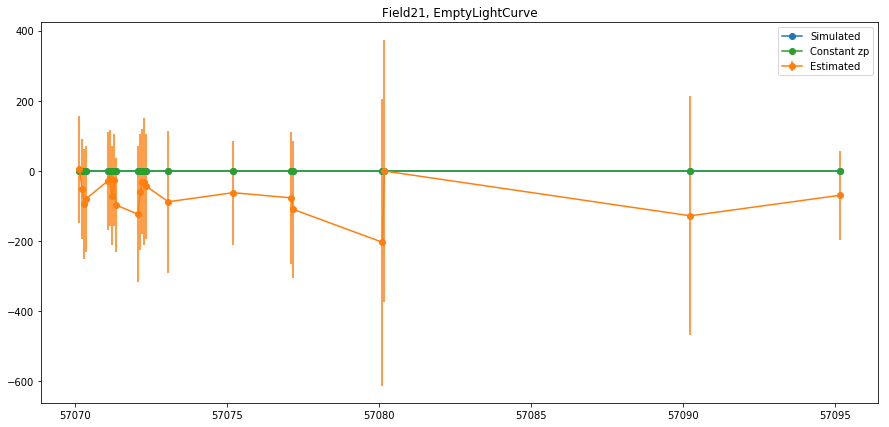

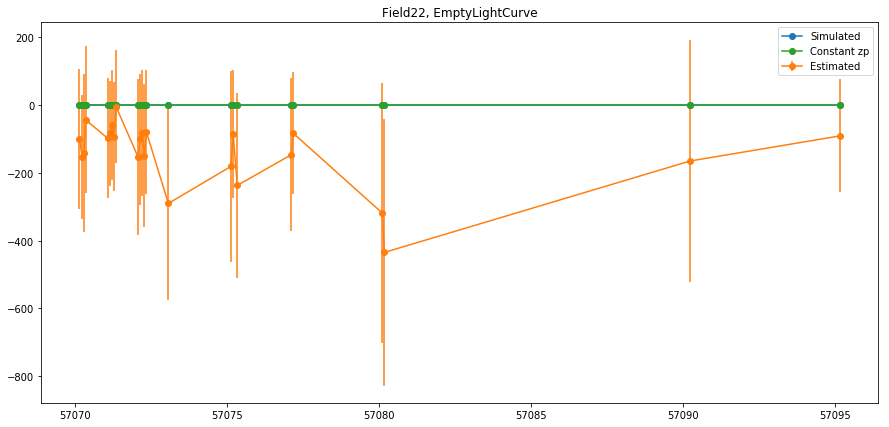

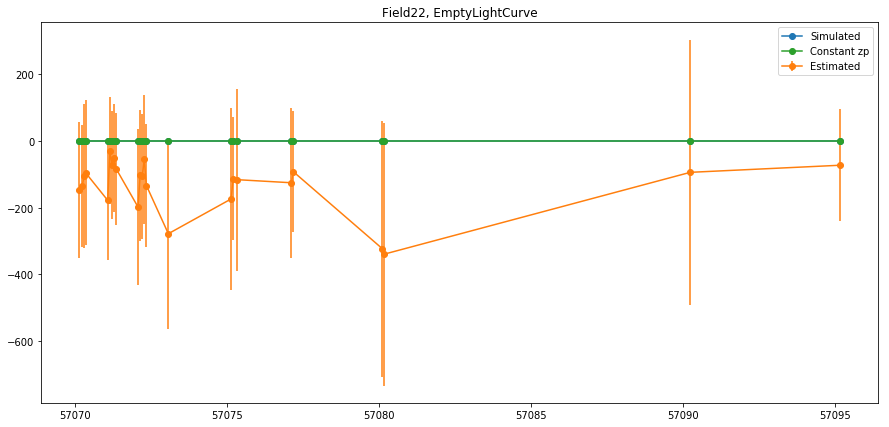

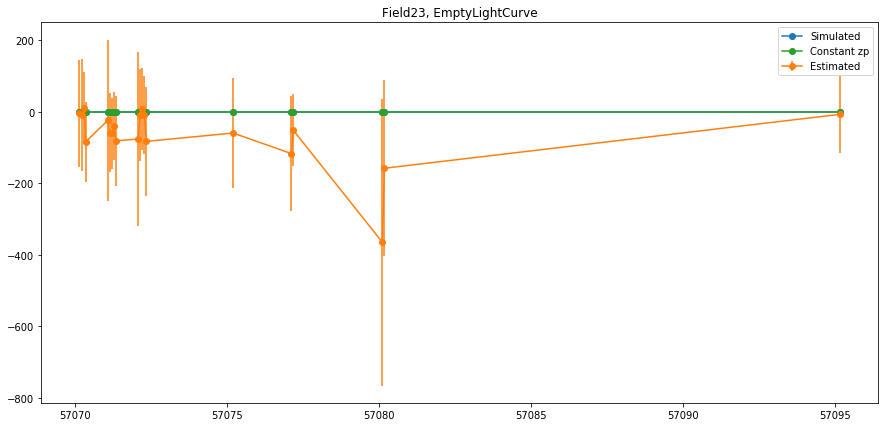

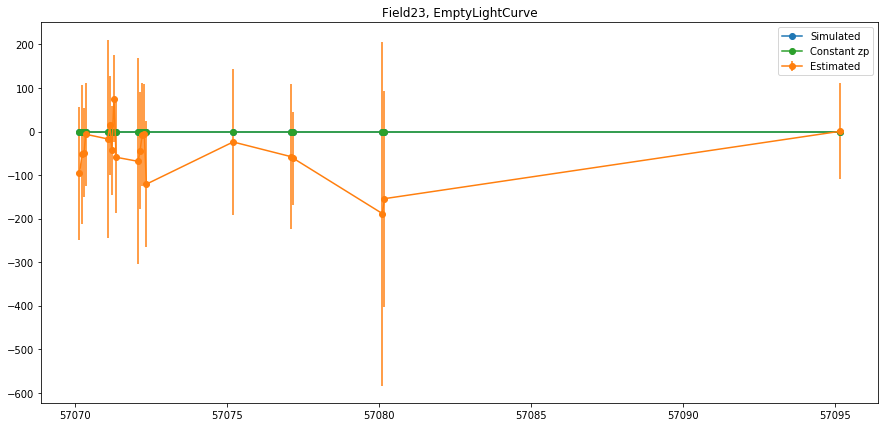

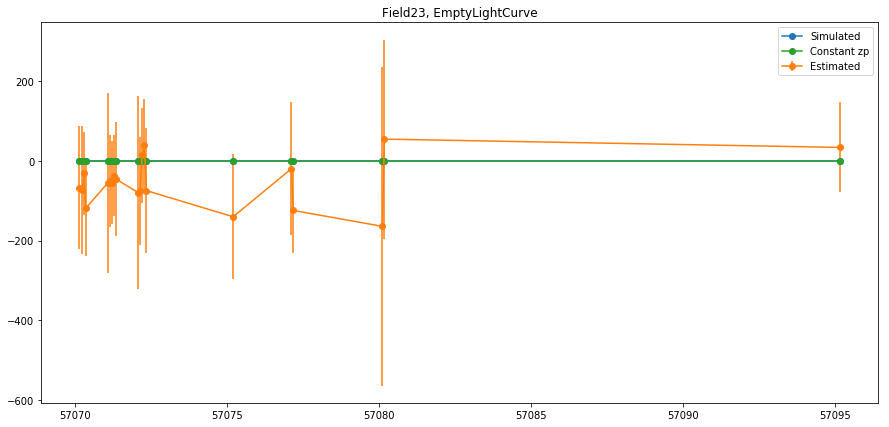

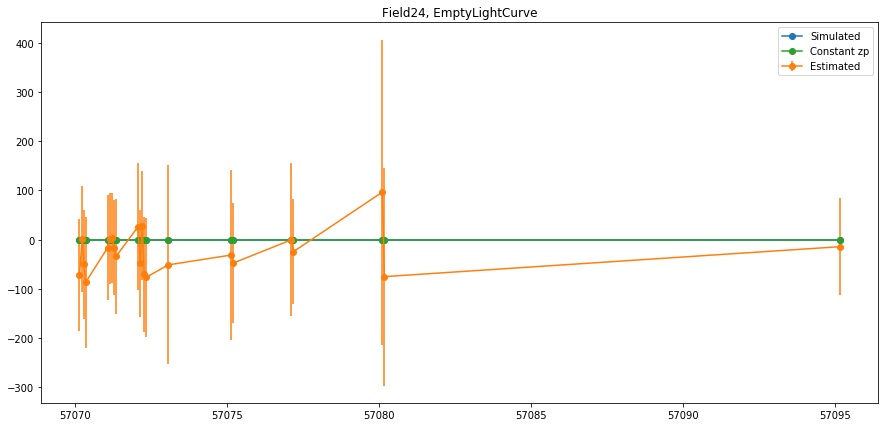

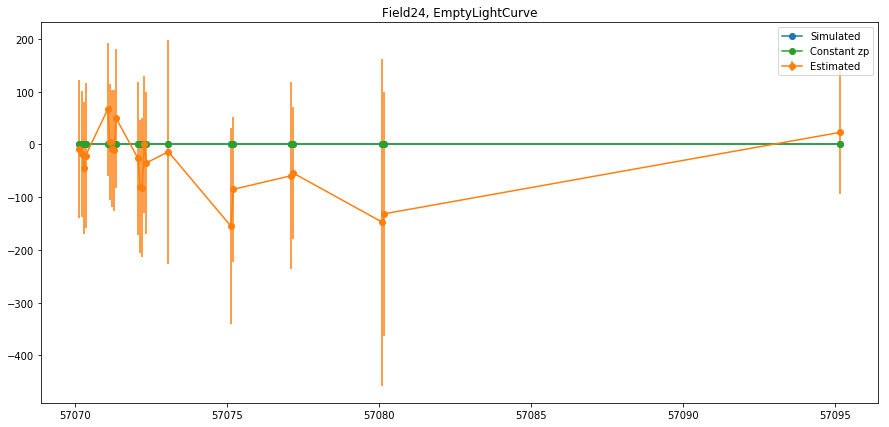

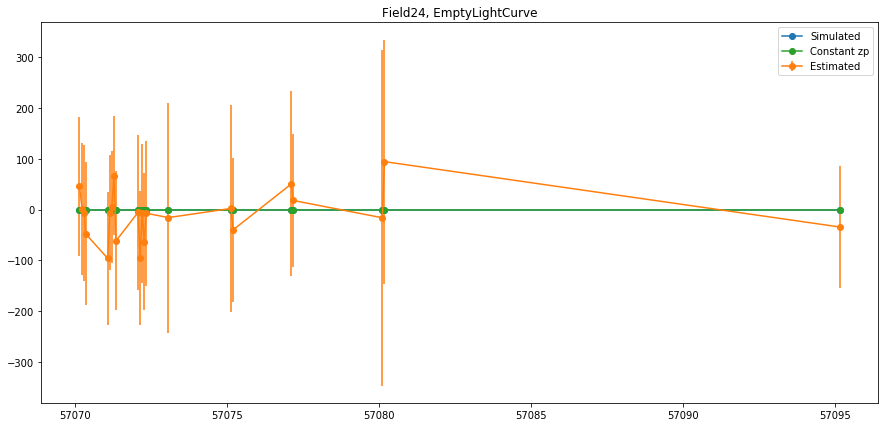

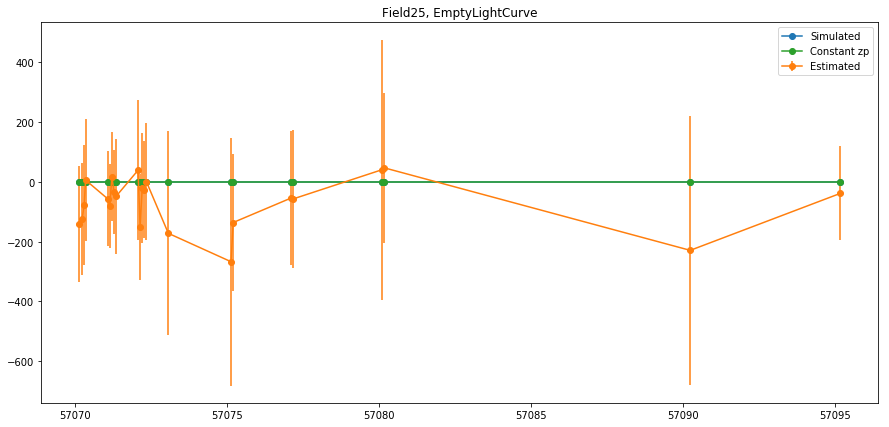

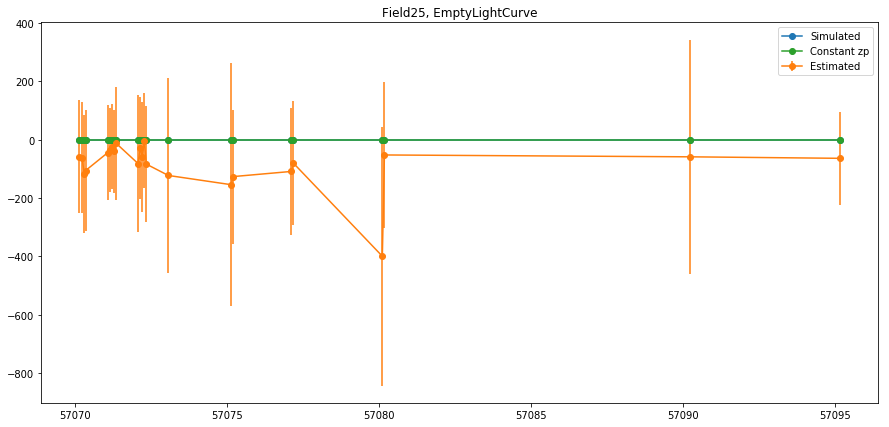

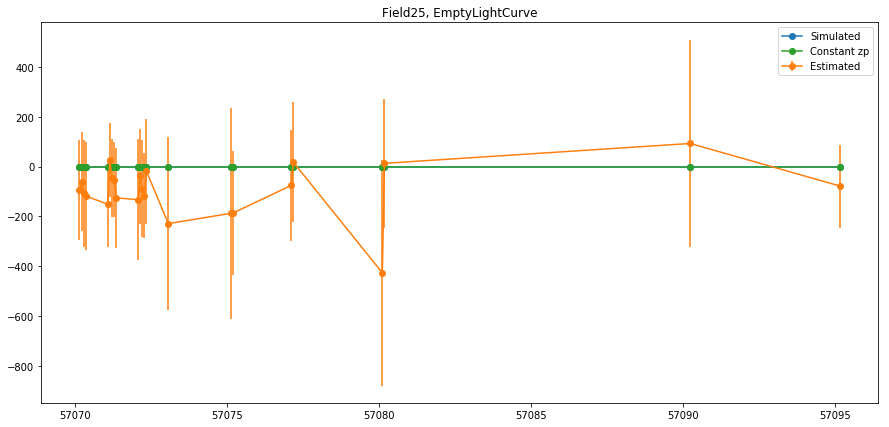

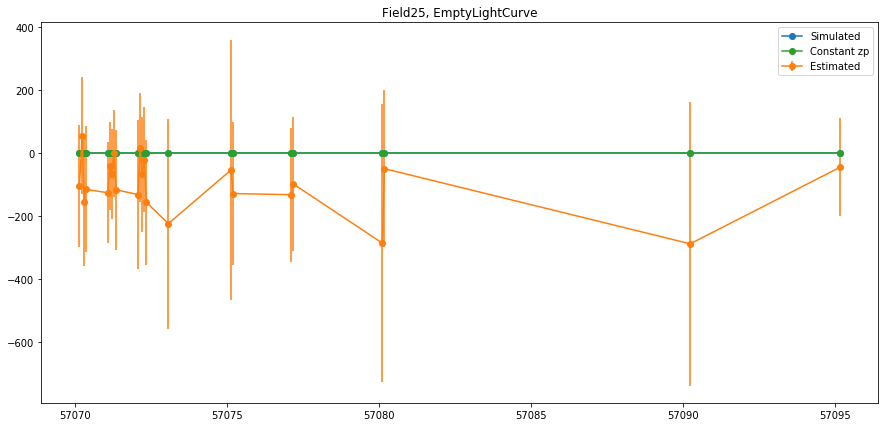

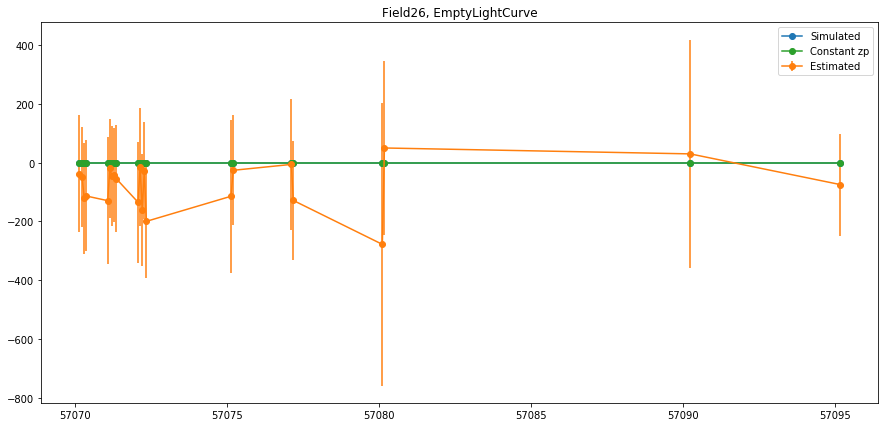

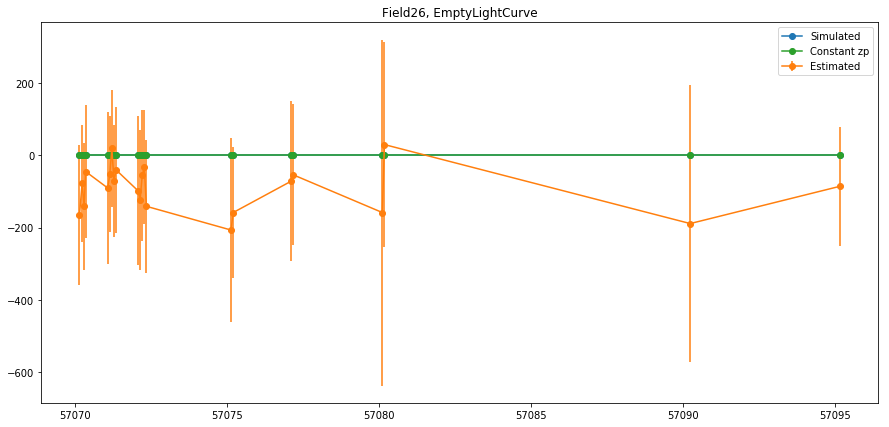

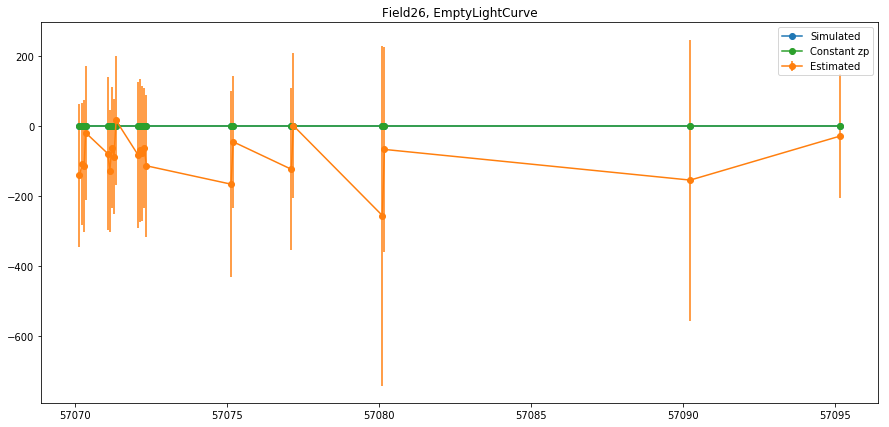

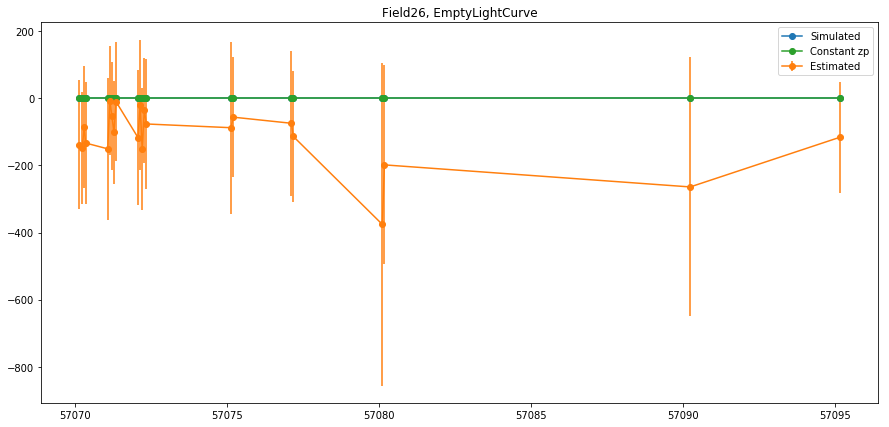

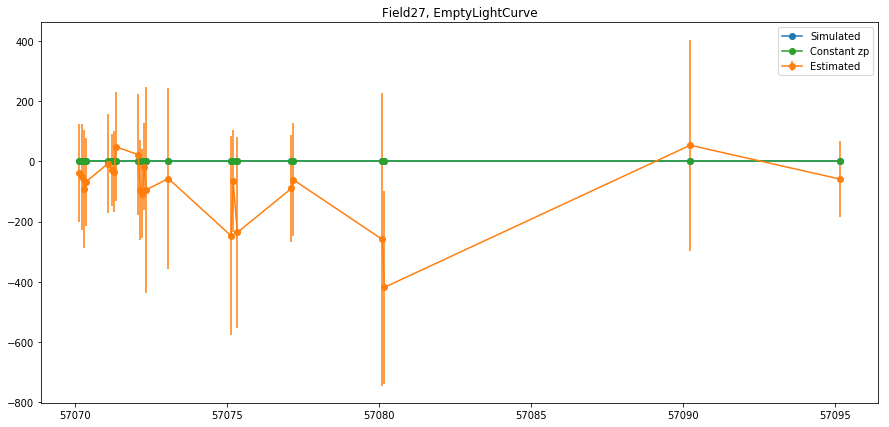

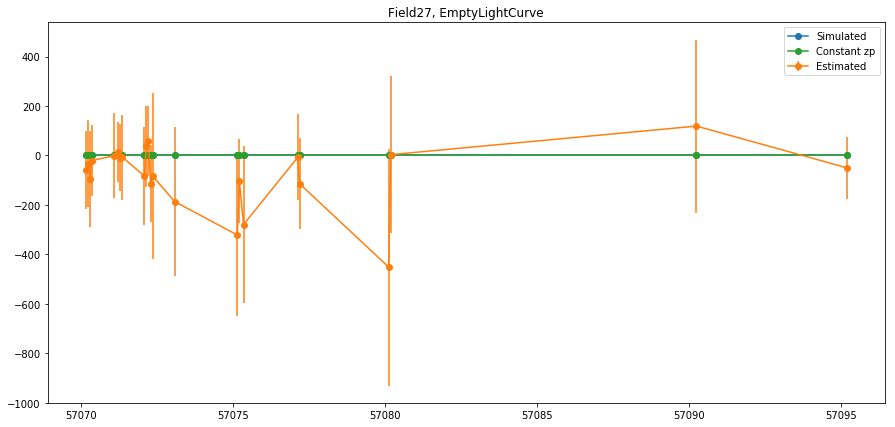

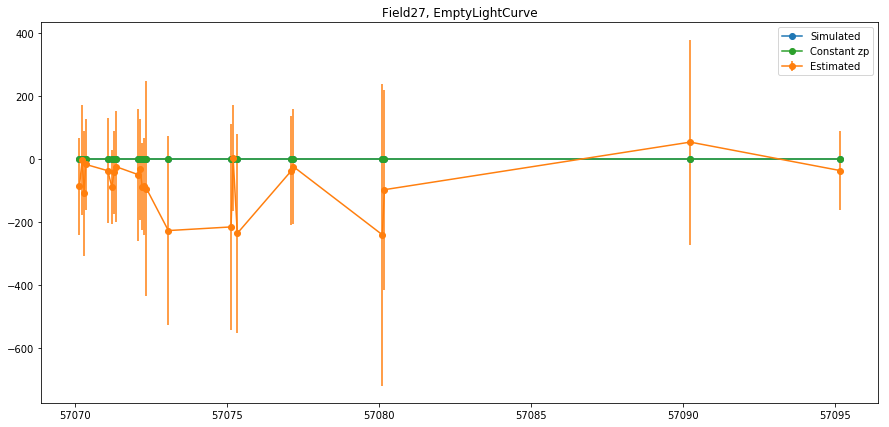

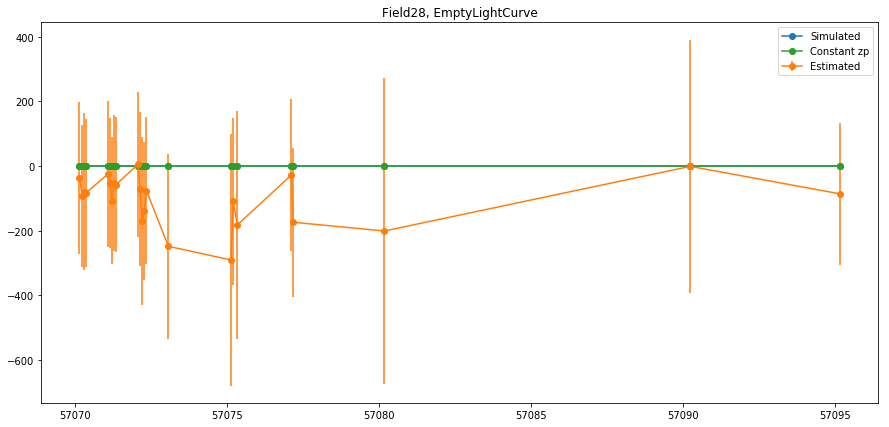

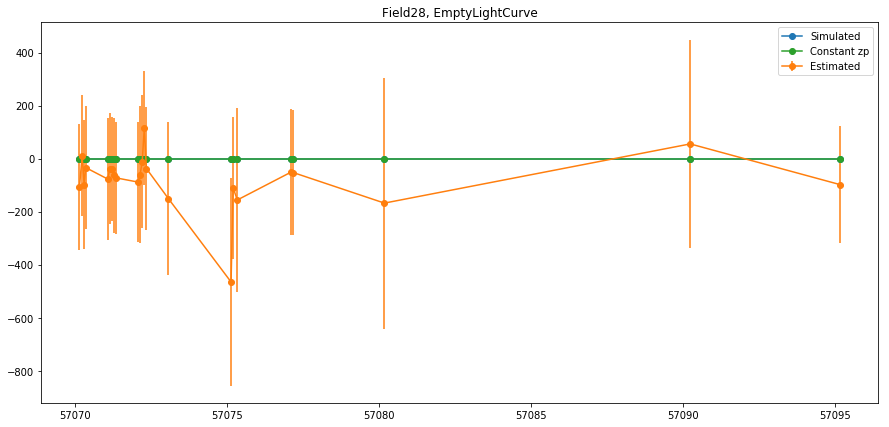

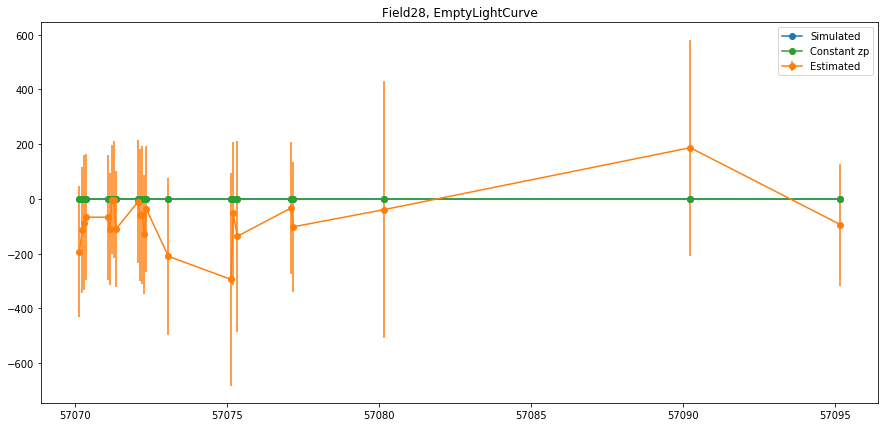

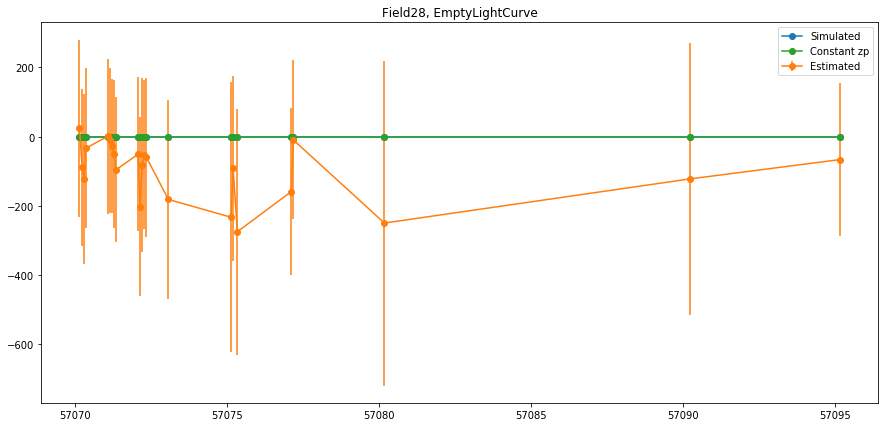

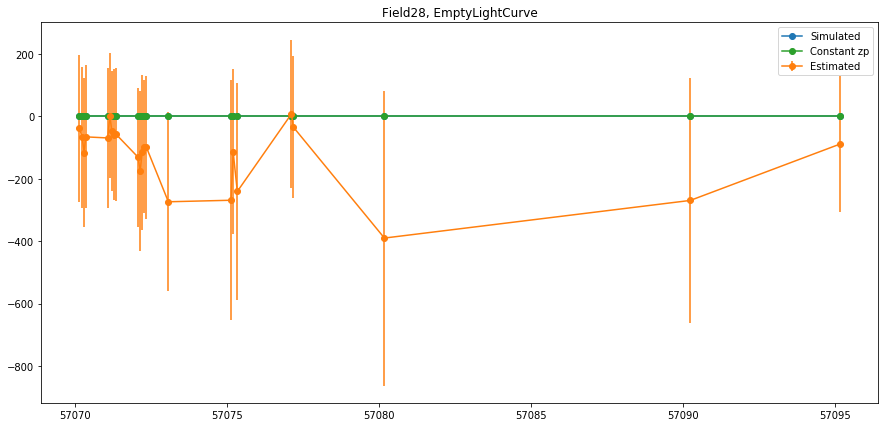

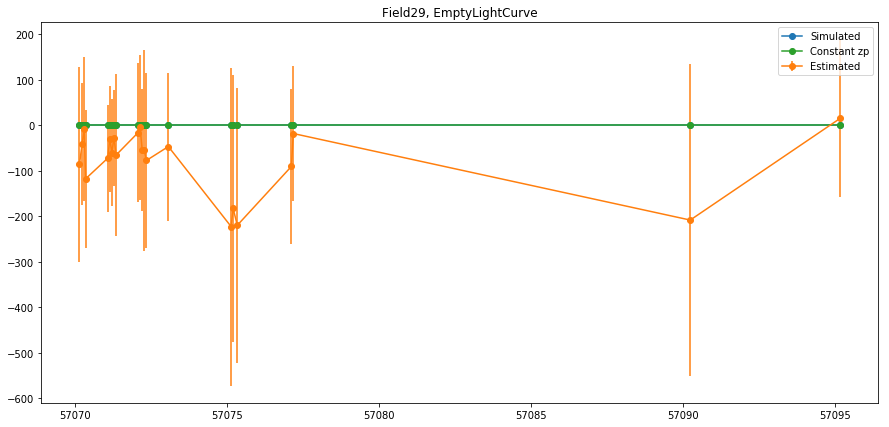

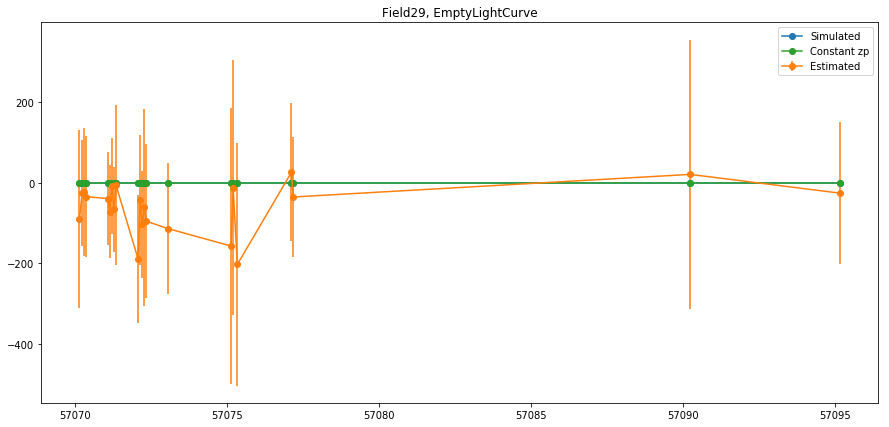

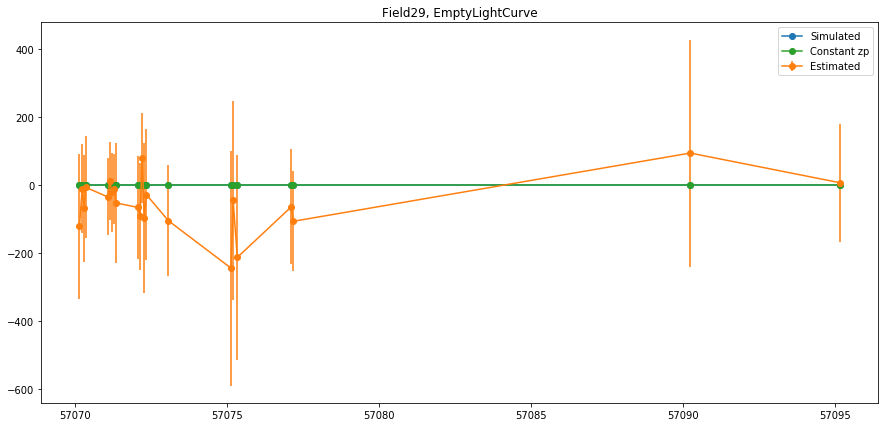

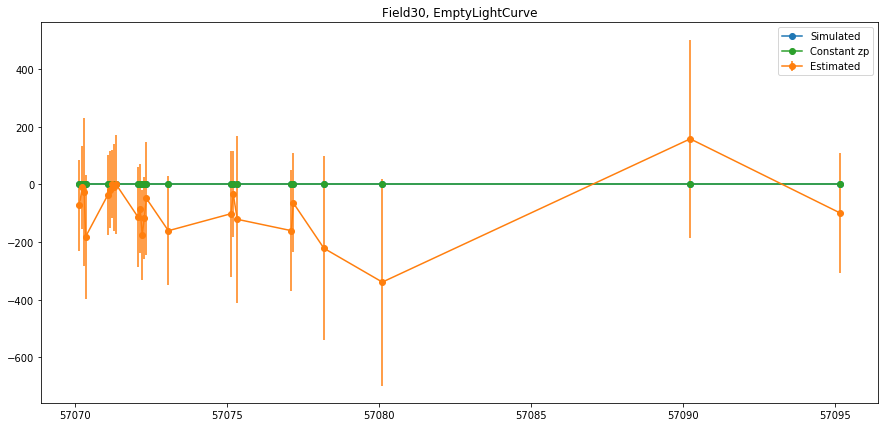

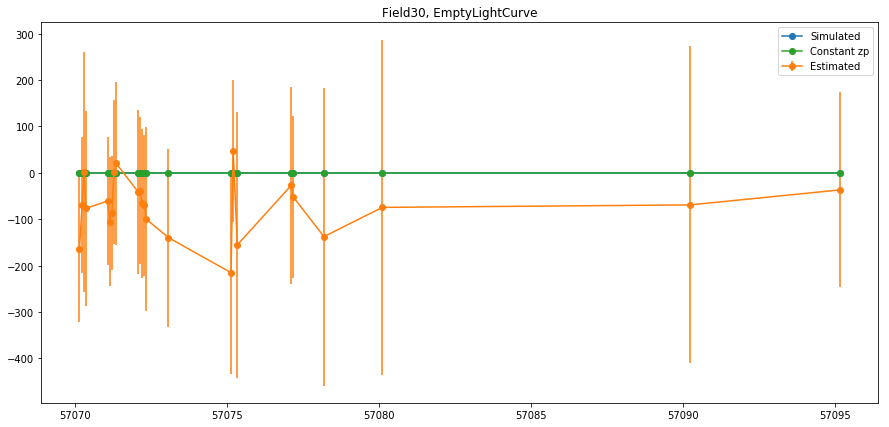

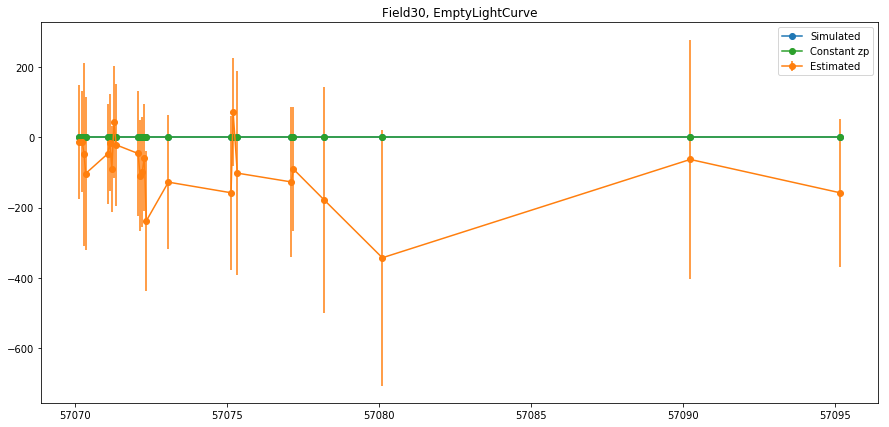

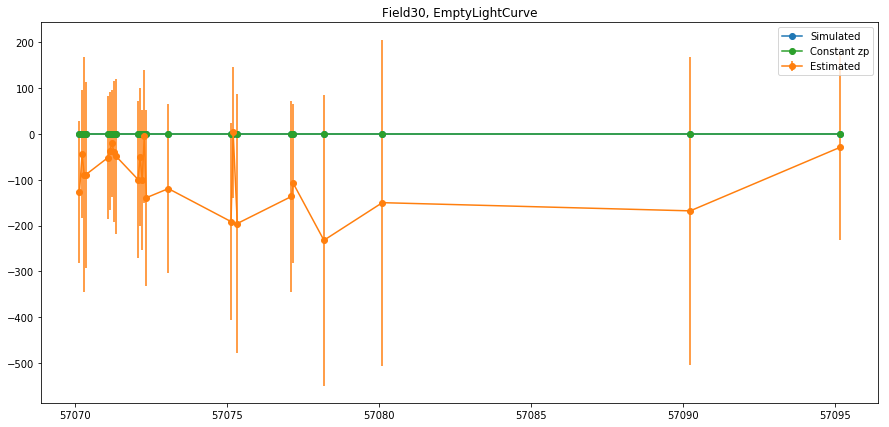

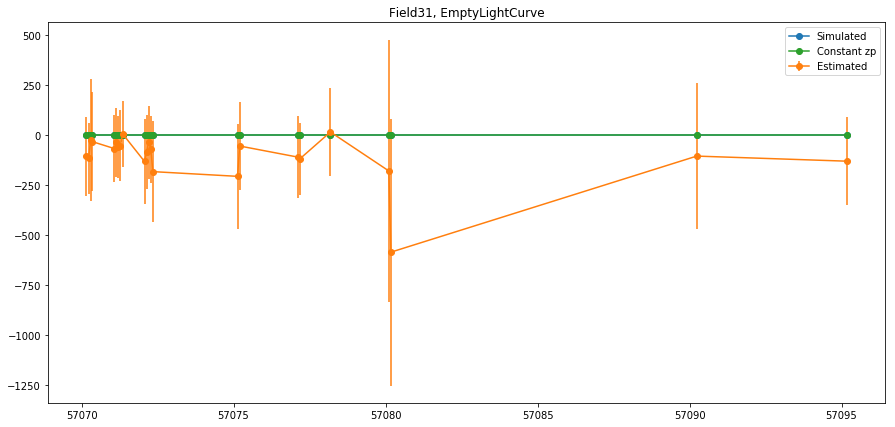

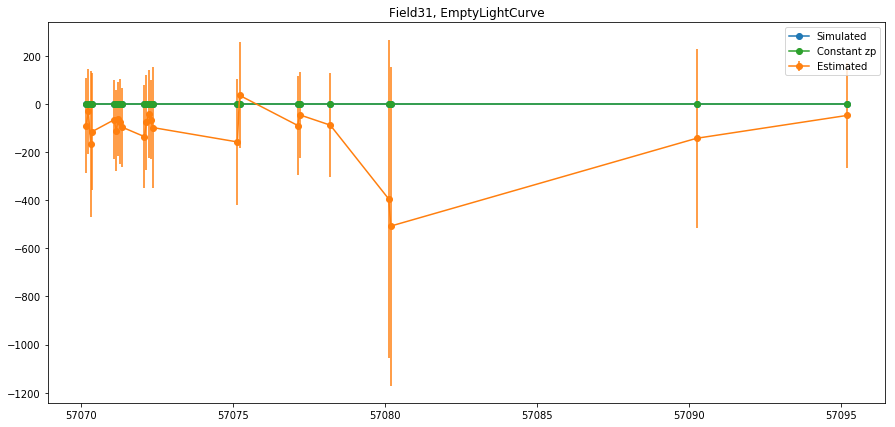

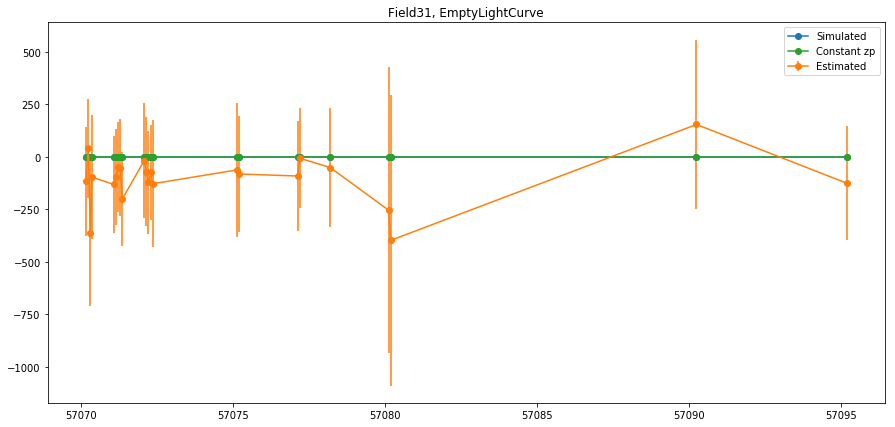

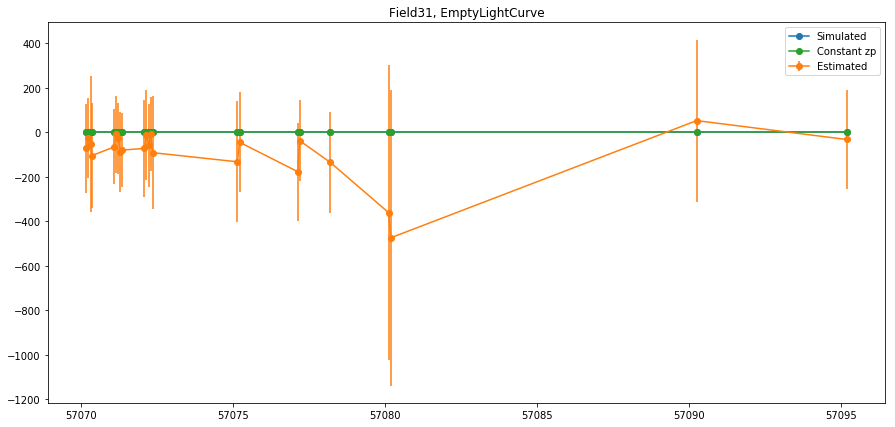

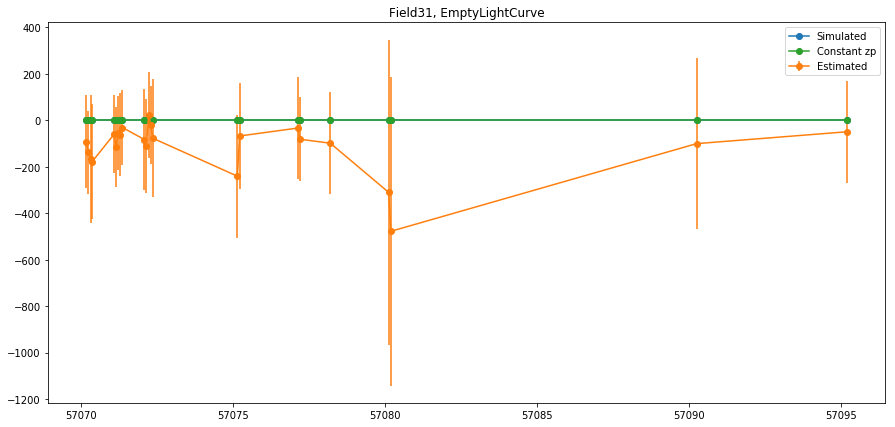

In [7]:
n_fields_to_plot = 30
n_lc_per_field = 30
photometry_data = h5py.File(save_path + file_name + ".hdf5", "r")
for field in list(image_data.keys())[:n_fields_to_plot]:
    good_quality_points = photometry_data[field]["obs_cond"]["good_quality_points"]["g"][:]
    days = photometry_data[field]["obs_cond"]["obs_day"]["g"][:][good_quality_points]
    zp = photometry_data[field]["obs_cond"]["zero_point"]["g"][:][good_quality_points]
    #zp = 25.0
    for i_lc in range(n_lc_per_field):
        simulated = photometry_data[field]["count_lightcurves"]["g"][:][i_lc, good_quality_points]
        simulated_mag = photometry_data[field]["lightcurves"]["g"][:][i_lc, good_quality_points]
        lc_type = photometry_data[field]["lc_type"][i_lc]
        if lc_type != "EmptyLightCurve":
            continue
        estimated_lc = photometry_data[field]["estimated_count_lc"][:][i_lc, good_quality_points]
        constant_zp = to_counts(simulated_mag, zp[0], 86.0)
        estimated_variance = photometry_data[field]["estimated_count_variance"][:][i_lc, good_quality_points]
        # print(zp)
        # print(np.sum(good_quality_points))
        # print(len(estimated_lc))
        f, ax1= plt.subplots(1, 1, figsize=(15, 7))
        ax1.plot(days, simulated, "-o", label="Simulated")
        ax1.errorbar(days, estimated_lc, fmt="-o", yerr=2*np.sqrt(estimated_variance), label="Estimated")
        ax1.plot(days, constant_zp, "-o", label="Constant zp")
        ax1.set_title(field+", "+lc_type)
        ax1.legend()
        #ax2.plot(days, np.abs(simulated-constant_zp)/np.amax(constant_zp), label="normalized count diff")
        #ax2.plot(days, np.abs(zp[0]-zp)/np.amax(zp), label="normalized zp diff")
        #ax2.legend()
        plt.show()
        plt.close("all")

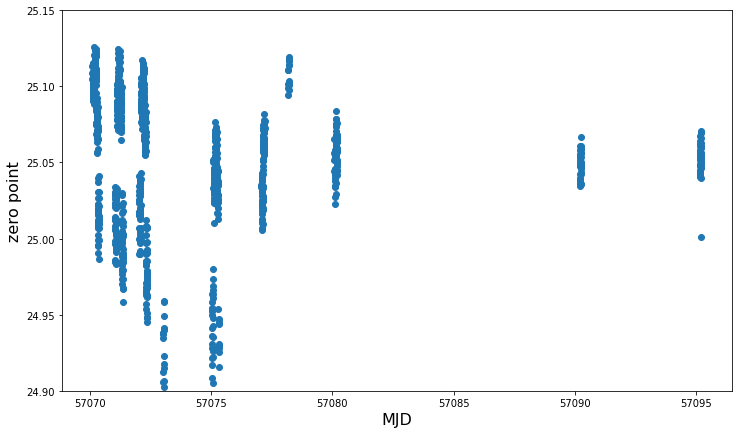

In [27]:
#photometry_data = h5py.File(save_path + file_name + ".hdf5", "r")
all_zp = []
all_days = []
for field in list(image_data.keys()):
    good_quality_points = photometry_data[field]["obs_cond"]["good_quality_points"]["g"][:]
    days = photometry_data[field]["obs_cond"]["obs_day"]["g"][:][good_quality_points]
    all_days.append(days)
    zp = photometry_data[field]["obs_cond"]["zero_point"]["g"][:][good_quality_points]
    all_zp.append(zp)
    #seeing = photometry_data[field]["obs_cond"]["seeing"]["g"][:]
    #for i in range(len(good_quality_points)):
    #    print(good_quality_points[i], zp[i], seeing[i])
all_zp = np.concatenate(all_zp)
all_days = np.concatenate(all_days)
plt.figure(figsize=(12,7))
plt.plot(all_days, all_zp, "o")
plt.ylabel("zero point", fontsize=16)
plt.xlabel("MJD", fontsize=16)
#plt.xlim([57070, 57075])
plt.ylim([24.9, 25.15])
plt.show()